In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from skbio.diversity import alpha_diversity
#pip install scikit-bio
from skbio.diversity.alpha import chao1
from skbio.diversity.alpha import shannon
from skbio.diversity.alpha import simpson
from skbio.diversity.alpha import observed_otus

#O índice de Shannon (H) leva em consideração tanto a abundância como a distribuição das espécies presentes na amostra. Quanto maior o valor do índice, maior é a diversidade de espécies presentes na amostra.

In [2]:
#Treatment of abundance data 
bacteria = pd.read_csv("bacteria_count.tsv", sep = '\t')

# Agrupar por 'Genus' e somar os valores
bacteria2 = bacteria.groupby('Genus').sum().reset_index()
bacteria2.set_index('Genus', inplace=True)
bacteria2.drop('Undetermined', axis=1, inplace=True)
bacteria2.drop('BLEACH', axis=1, inplace=True)
bacteria2.drop('H2O', axis=1, inplace=True)

fago = pd.read_csv("fago_count.tsv", sep = '\t')
# Agrupar por 'Genus' e somar os valores
fago2 = fago.groupby('Genus').sum().reset_index()
fago2.set_index('Genus', inplace=True)
fago2.drop('Undetermined', axis=1, inplace=True)
fago2.drop('BLEACH', axis=1, inplace=True)
fago2.drop('H2O', axis=1, inplace=True)

#Alfa and beta diversity analysis from virus samples
eukaryota = pd.read_csv("fungos_count.tsv", sep = '\t')
# Modificando os nomes das colunas
new_columns = [col.split('_')[0] for col in eukaryota.columns]
eukaryota.columns = new_columns
eukaryota.drop('Undetermined', axis=1, inplace=True)
eukaryota.drop('BLEACH', axis=1, inplace=True)
eukaryota.drop('H2O', axis=1, inplace=True)

# Agrupar por 'Genus' e somar os valores
eukaryota2 = eukaryota.groupby('Genus').sum().reset_index()
eukaryota2.set_index('Genus', inplace=True)

#Alfa and beta diversity analysis from virus samples
virus = pd.read_csv("virus_count.tsv", sep = '\t')
# Modificando os nomes das colunas
new_columns = [col.split('_')[0] for col in virus.columns]
virus.columns = new_columns
virus.drop('Undetermined', axis=1, inplace=True)
virus.drop('BLEACH', axis=1, inplace=True)
virus.drop('H2O', axis=1, inplace=True)
# Agrupar por 'Genus' e somar os valores
virus2 = virus.groupby('Genus').sum().reset_index()
virus2.set_index('Genus', inplace=True)
virus2

M379  M433  M357  M352  M477  M511  M517  M399  M480  \
Genus                                                                         
Alphachrysovirus          0     0    64     0     0     0     0     0     0   
Alphapapillomavirus       0     0     0     0     0     0     0     0     0   
Alphapartitivirus         0     0     0     0     0     0     0     0     0   
Alphapolyomavirus         0     0     0     0     0     0     0     0     0   
Benyvirus                 0     0     0     0     0     0     0     0     0   
Betacoronavirus           0     0     0     0     0     0     0     0     0   
Betapapillomavirus        0     0     0     0     0     0     0     0     0   
Bocaparvovirus            0  7132     0     0     0     0     0     0     0   
Botybirnavirus            0     0     0     0     0     0     0     0     0   
Closterovirus             0     0     0     0     0     0     0     0     0   
Cripavirus                0     0     0     0     0     0     0     0     0   
Cytomegalovirus           0     0     0     0     0     0     0     0     0   
Dependoparvovirus         0     0     0     0     0     0     0     0     0   
Drulisvirus               0     0     0     0     0     0     0     0     0   
Enterovirus          149033     0     0     0     0     0     0     0     0   
Epseptimavirus            0     0     0     0     0     0     0     0     0   
Ermolevavirus             0     0     0     0     0     0     0     0     0   
Gammapartitivirus         0     0     0     0     0     0     0     0     0   
Gammaretrovirus           0     0     0     0     0     0     0     0     0   
Gemycircularvirus         0     0     0     0     0     0     0     0     0   
Gemykibivirus             0     0     0     0     0     0     0     0     0   
Gyrovirus                 0     0     0     0     0     0     0     0     0   
Hypovirus                 0     0     0     0     0     0     0     0     0   
Lentivirus                0     0     0     0     0     0     0     0     0   
Lymphocryptovirus         0     0     0     0     0     0     0     0     0   
Mamastrovirus             0     0     0     0     0     0     0     0     0   
Mastadenovirus            0     0     0    24     0     0     0     0     0   
Narnavirus                0     0     0     0     0     0     0     0     0   
Norovirus                 0     0     0     0     0     0     0     0     0   
Ourmiavirus               0     0     0     0     0     0     0     0     0   
Pegivirus                 0     0     0     0     0     0     0     0     0   
Phutvirus                 0     0     0     0     0     0     0     0     0   
Pijolavirus               0     0     0     0     0     0     0     0     0   
Potyvirus                 0     0     0     0     0     0     0     0     0   
Raphidovirus              0     0     0     0     0     0     0     0     0   
Roseolovirus              0     0     0     0     0     0     0     0     0   
Rotavirus                 0     0     0    22     0     0     0     0     0   
Sepunavirus               0     0     0     0     0     0     0     0     0   
Simplexvirus              0     0     0     0     0     0     0     0     0   
Tequintavirus             0     0     0     0     0     0     0     0     0   
Tobamovirus               0     0     0     0     0     0     0     0     0   
Torbevirus                0     0     0     0     0     0     0     0     0   
Totivirus                 0    30     0     0     0     0     0     0     0   
Varicellovirus            0     0     0     0     0     0     0     0     0   
Webervirus                0     0     0     0     0     0     0     0     0   

                     M420  ...  M479  M529  M372  M509  M474  M516  M498  \
Genus                      ...                                             
Alphachrysovirus        0  ...     0     0     0     0     0     0     0   
Alphapapillomavirus     0  ...     0     0     0     0     0     0     0   
Alpha

In [302]:
# Remove columns where all values are zero or NaN
df_cleaned_columns = virus2.drop(columns=[col for col in virus2.columns if (virus2[col].fillna(0) == 0).all()])

# Remove rows where all values are zero or NaN
df_cleaned = df_cleaned_columns.drop(index=[index for index in df_cleaned_columns.index if (df_cleaned_columns.loc[index].fillna(0) == 0).all()])
df_cleaned


M379  M433  M357  M352  M501  M524  M474  M516  M498  \
Genus                                                                      
Alphachrysovirus       0     0    64     0     0     0     0     0     0   
Betacoronavirus        0     0     0     0     0     0     0     0     0   
Bocaparvovirus         0  7132     0     0     0     0   241     0     0   
Enterovirus       149033     0     0     0     0     0     0     0     0   
Mastadenovirus         0     0     0    24     0     0     0     0     0   
Rotavirus              0     0     0    22    22    34     0    36     0   
Simplexvirus           0     0     0     0     0     0     0     0  4566   
Totivirus              0    30     0     0     0     0     0   487     0   

                   M526  M384  M530  
Genus                                
Alphachrysovirus      0     0     0  
Betacoronavirus   77204  3100     0  
Bocaparvovirus        0     0     0  
Enterovirus           0     0  2467  
Mastadenovirus        0     0     0  
Rotavirus             0     0     0  
Simplexvirus          0     0     0  
Totivirus             0     0     0

In [303]:
df_cleaned_columns = eukaryota2.drop(columns=[col for col in eukaryota2.columns if (eukaryota2[col].fillna(0) == 0).all()])

# Remove rows where all values are zero or NaN
df_cleaned = df_cleaned_columns.drop(index=[index for index in df_cleaned_columns.index if (df_cleaned_columns.loc[index].fillna(0) == 0).all()])
df_cleaned

M353  M420  M352  M357  M474  M373  M318  M435  M529  M444  \
Genus                                                                         
Albugo              0     0     0     0     0     0     0     0     0     0   
Aleurobotrys      224     0     0     0     0     0     0     0     0     0   
Alternaria          0    24    28     0     0     0     0     0     0     0   
Amanita             0     0     0     0     0     0     0     0     0     0   
Amycosphaerella     0     0     0     0     0     0     0     0     0     0   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Xylaria            87     0     0     0    88    21     0     0     0     0   
Xylobolus         409     0     0     0     0     0     0     0     0     0   
Xylochrysis         0     0     0    29     0     0     0     0     0     0   
Zasmidium           0     0    32    38     0     0     0     0     0    49   
Zymoseptoria       29    50    50     0     0     0     0     0     0     0   

                 ...  M498  M484  M509  M524  M507  M442  M431  M480  M374  \
Genus            ...                                                         
Albugo           ...     0     0     0     0     0   287     0     0     0   
Aleurobotrys     ...     0     0     0     0     0     0     0     0     0   
Alternaria       ...     0     0     0     0     0     0     0     0     0   
Amanita          ...     0     0     0     0     0     0    60     0     0   
Amycosphaerella  ...     0     0     0     0     0     0     0     0     0   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Xylaria          ...     0     0     0     0     0     0     0     0     0   
Xylobolus        ...     0     0     0     0     0     0     0     0     0   
Xylochrysis      ...     0     0     0     0     0     0     0     0     0   
Zasmidium        ...     0     0     0     0     0     0     0     0     0   
Zymoseptoria     ...     0     0     0     0     0     0     0     0     0   

                 M485  
Genus                  
Albugo              0  
Aleurobotrys        0  
Alternaria          0  
Amanita             0  
Amycosphaerella     0  
...               ...  
Xylaria             0  
Xylobolus           0  
Xylochrysis         0  
Zasmidium           0  
Zymoseptoria        0  

[235 rows x 60 columns]

In [304]:
df_cleaned_columns = bacteria2.drop(columns=[col for col in bacteria2.columns if (bacteria2[col].fillna(0) == 0).all()])

# Remove rows where all values are zero or NaN
df_cleaned = df_cleaned_columns.drop(index=[index for index in df_cleaned_columns.index if (df_cleaned_columns.loc[index].fillna(0) == 0).all()])
df_cleaned

M352  M420  M485  M353  M474  M435  M480  M318  M487  \
Genus                                                                       
Achromobacter         310   139   275     0   160   319   362     0   279   
Acidibrevibacterium   939     0   118     0     0   110   113     0     0   
Acidovorax           1135   215   365   189   606   352   653     0   163   
Acinetobacter         518   232   926   384  1750   838   136   336     0   
Actinoalloteichus    1414   170     0     0     0     0     0     0     0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Truepera              445   129     0     0     0     0     0     0   112   
Tsukamurella            0     0     0     0     0     0     0     0     0   
Variovorax            340     0   302     0   294   109   239     0     0   
Veillonella             0     0     0     0     0     0     0     0     0   
Xanthomonas           246     0     0     0     0     0     0     0     0   

                     M396  ...  M407  M393  M513  M499  M458  M431  M452  \
Genus                      ...                                             
Achromobacter           0  ...     0     0     0     0     0     0     0   
Acidibrevibacterium     0  ...     0     0     0     0     0     0     0   
Acidovorax              0  ...     0     0     0     0     0     0     0   
Acinetobacter           0  ...     0     0     0     0     0     0     0   
Actinoalloteichus       0  ...     0     0     0     0     0     0     0   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
Truepera                0  ...     0     0     0     0     0     0     0   
Tsukamurella            0  ...     0     0     0     0     0     0     0   
Variovorax              0  ...     0     0     0     0     0     0     0   
Veillonella             0  ...     0     0     0     0     0     0     0   
Xanthomonas             0  ...     0     0     0     0     0     0     0   

                     M448  M428   M490  
Genus                                   
Achromobacter           0     0      0  
Acidibrevibacterium     0     0      0  
Acidovorax              0     0      0  
Acinetobacter           0     0  32756  
Actinoalloteichus       0     0      0  
...                   ...   ...    ...  
Truepera                0     0      0  
Tsukamurella            0     0      0  
Variovorax              0     0      0  
Veillonella             0     0      0  
Xanthomonas             0     0      0  

[172 rows x 72 columns]

In [ ]:
row_sums = eukaryota2.sum(axis=1)
row_sums.to_csv('eukaryota_sumareads.tsv', index=True, sep='\t')
# Soma total de todas as linhas
total_sum = row_sums.sum()

# Adicionar coluna com a porcentagem do total
percent = (row_sums/total_sum)*100

percent.to_csv('eukaryota_percentreads.tsv', index=True, sep='\t')

In [3]:
df = pd.concat([bacteria2, eukaryota2, virus2, fago2], axis=0)
# Reemplazar valores vacíos con cero
df = df.fillna(0)
df.to_csv('alltaxon_abundance.tsv', index=True, sep='\t')
df

M352  M420  M485  M353  M474  M435  M480  M318  M487  \
Genus                                                                       
Achromobacter         310   139   275     0   160   319   362     0   279   
Acidibrevibacterium   939     0   118     0     0   110   113     0     0   
Acidovorax           1135   215   365   189   606   352   653     0   163   
Acinetobacter         518   232   926   384  1750   838   136   336     0   
Actinoalloteichus    1414   170     0     0     0     0     0     0     0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Andhravirus             0     0     0     0     0     0     0     0     0   
Biseptimavirus          0     0     0     0     0     0     0     0     0   
Pahexavirus             0     0  1234     0     0     0   166   190     0   
Phietavirus             0     0     0     0     0     0     0     0     0   
Sextaecvirus            0     0     0     0     0     0     0     0     0   

                     M396  ...  M407  M393  M513  M499  M458  M431  M452  \
Genus                      ...                                             
Achromobacter           0  ...     0     0     0     0     0     0     0   
Acidibrevibacterium     0  ...     0     0     0     0     0     0     0   
Acidovorax              0  ...     0     0     0     0     0     0     0   
Acinetobacter           0  ...     0     0     0     0     0     0     0   
Actinoalloteichus       0  ...     0     0     0     0     0     0     0   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
Andhravirus             0  ...     0     0     0     0    27     0     0   
Biseptimavirus          0  ...     0     0     0     0    74     0     0   
Pahexavirus           106  ...     0     0     0     0     0     0     0   
Phietavirus             0  ...     0     0     0     0   430   161     0   
Sextaecvirus            0  ...     0     0     0     0   359     0     0   

                     M448  M428   M490  
Genus                                   
Achromobacter           0     0      0  
Acidibrevibacterium     0     0      0  
Acidovorax              0     0      0  
Acinetobacter           0     0  32756  
Actinoalloteichus       0     0      0  
...                   ...   ...    ...  
Andhravirus             0     0      0  
Biseptimavirus          0     0      0  
Pahexavirus             0     0      0  
Phietavirus             0     0      0  
Sextaecvirus            0     0      0  

[558 rows x 72 columns]

In [4]:
#Import metadata
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from skbio.diversity import alpha_diversity

df_total = pd.read_csv("alltaxon_abundance.tsv", sep = '\t', index_col=0)
df_total

M352  M420  M485  M353  M474  M435  M480  M318  M487  \
Genus                                                                       
Achromobacter         310   139   275     0   160   319   362     0   279   
Acidibrevibacterium   939     0   118     0     0   110   113     0     0   
Acidovorax           1135   215   365   189   606   352   653     0   163   
Acinetobacter         518   232   926   384  1750   838   136   336     0   
Actinoalloteichus    1414   170     0     0     0     0     0     0     0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Andhravirus             0     0     0     0     0     0     0     0     0   
Biseptimavirus          0     0     0     0     0     0     0     0     0   
Pahexavirus             0     0  1234     0     0     0   166   190     0   
Phietavirus             0     0     0     0     0     0     0     0     0   
Sextaecvirus            0     0     0     0     0     0     0     0     0   

                     M396  ...  M407  M393  M513  M499  M458  M431  M452  \
Genus                      ...                                             
Achromobacter           0  ...     0     0     0     0     0     0     0   
Acidibrevibacterium     0  ...     0     0     0     0     0     0     0   
Acidovorax              0  ...     0     0     0     0     0     0     0   
Acinetobacter           0  ...     0     0     0     0     0     0     0   
Actinoalloteichus       0  ...     0     0     0     0     0     0     0   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
Andhravirus             0  ...     0     0     0     0    27     0     0   
Biseptimavirus          0  ...     0     0     0     0    74     0     0   
Pahexavirus           106  ...     0     0     0     0     0     0     0   
Phietavirus             0  ...     0     0     0     0   430   161     0   
Sextaecvirus            0  ...     0     0     0     0   359     0     0   

                     M448  M428   M490  
Genus                                   
Achromobacter           0     0      0  
Acidibrevibacterium     0     0      0  
Acidovorax              0     0      0  
Acinetobacter           0     0  32756  
Actinoalloteichus       0     0      0  
...                   ...   ...    ...  
Andhravirus             0     0      0  
Biseptimavirus          0     0      0  
Pahexavirus             0     0      0  
Phietavirus             0     0      0  
Sextaecvirus            0     0      0  

[558 rows x 72 columns]

In [5]:
df_kw = df_total.T
# Transform relative abundance with Calculate row sums
row_sums = df_kw.sum(axis=1)
df_kw2 = df_kw.div(row_sums, axis=0)
df_kw2

Genus  Achromobacter  Acidibrevibacterium  Acidovorax  Acinetobacter  \
M352        0.001919             0.005813    0.007026       0.003206   
M420        0.001216             0.000000    0.001881       0.002029   
M485        0.005351             0.002296    0.007102       0.018018   
M353        0.000000             0.000000    0.000995       0.002021   
M474        0.001931             0.000000    0.007315       0.021125   
...              ...                  ...         ...            ...   
M431        0.000000             0.000000    0.000000       0.000000   
M452        0.000000             0.000000    0.000000       0.000000   
M448        0.000000             0.000000    0.000000       0.000000   
M428        0.000000             0.000000    0.000000       0.000000   
M490        0.000000             0.000000    0.000000       0.834420   

Genus  Actinoalloteichus  Actinomyces  Actinomycetospora  Actinoplanes  \
M352            0.008753          0.0           0.008307           0.0   
M420            0.001487          0.0           0.000000           0.0   
M485            0.000000          0.0           0.000000           0.0   
M353            0.000000          0.0           0.000000           0.0   
M474            0.000000          0.0           0.000000           0.0   
...                  ...          ...                ...           ...   
M431            0.000000          0.0           0.000000           0.0   
M452            0.000000          0.0           0.000000           0.0   
M448            0.000000          0.0           0.000000           0.0   
M428            0.000000          0.0           0.000000           0.0   
M490            0.000000          0.0           0.000000           0.0   

Genus  Actinosynnema  Adhaeribacter  ...  Tobamovirus  Torbevirus  Totivirus  \
M352        0.001857            0.0  ...          0.0         0.0        0.0   
M420        0.000000            0.0  ...          0.0         0.0        0.0   
M485        0.000000            0.0  ...          0.0         0.0        0.0   
M353        0.000000            0.0  ...          0.0         0.0        0.0   
M474        0.000000            0.0  ...          0.0         0.0        0.0   
...              ...            ...  ...          ...         ...        ...   
M431        0.000000            0.0  ...          0.0         0.0        0.0   
M452        0.000000            0.0  ...          0.0         0.0        0.0   
M448        0.000000            0.0  ...          0.0         0.0        0.0   
M428        0.000000            0.0  ...          0.0         0.0        0.0   
M490        0.000000            0.0  ...          0.0         0.0        0.0   

Genus  Varicellovirus  Webervirus  Andhravirus  Biseptimavirus  Pahexavirus  \
M352              0.0         0.0          0.0             0.0     0.000000   
M420              0.0         0.0          0.0             0.0     0.000000   
M485              0.0         0.0          0.0             0.0     0.024012   
M353              0.0         0.0          0.0             0.0     0.000000   
M474              0.0         0.0          0.0             0.0     0.000000   
...               ...         ...          ...             ...          ...   
M431              0.0         0.0          0.0             0.0     0.000000   
M452              0.0         0.0          0.0             0.0     0.000000   
M448              0.0         0.0          0.0             0.0     0.000000   
M428              0.0         0.0          0.0             0.0     0.000000   
M490              0.0         0.0          0.0             0.0     0.000000   

Genus  Phietavirus  Sextaecvirus  
M352      0.000000           0.0  
M420      0.000000           0.0  
M485      0.000000           0.0  
M353      0.000000           0.0  
M474      0.000000           0.0  
...            ...           ...  
M431      0.000332           0.0  
M452      0.000000           0.0  
M448      0.000000   

In [66]:
#Import metadata
metadata2 = pd.read_csv("metadata2.tsv", sep = '\t', index_col=0)
metadata2

Year  Genero  CK_FEBRE  CK_TOSSE  CK_DOR_GARG  CK_DIF_RESP  \
Samples                                                                
M318     31-40       0       1.0       0.0          0.0          0.0   
M352     20-30       1       0.0       0.0          0.0          0.0   
M353     41-50       0       1.0       1.0          0.0          0.0   
M357     20-30       0       1.0       1.0          1.0          0.0   
M359       >50       0       0.0       0.0          0.0          0.0   
...        ...     ...       ...       ...          ...          ...   
M517     41-50       0       0.0       0.0          1.0          0.0   
M524     31-40       0       0.0       1.0          1.0          0.0   
M526     41-50       1       0.0       1.0          1.0          0.0   
M529     20-30       0       0.0       0.0          0.0          0.0   
M530     31-40       0       NaN       NaN          NaN          NaN   

         CK_DIARREIA  CK_VOMITO  CK_CEFALEIA  CK_CORIZA  ...  \
Samples                                                  ...   
M318             0.0        1.0          1.0        0.0  ...   
M352             0.0        0.0          1.0        1.0  ...   
M353             1.0        1.0          1.0        0.0  ...   
M357             0.0        1.0          1.0        1.0  ...   
M359             0.0        1.0          1.0        0.0  ...   
...              ...        ...          ...        ...  ...   
M517             0.0        0.0          1.0        0.0  ...   
M524             0.0        0.0          1.0        1.0  ...   
M526             0.0        0.0          1.0        1.0  ...   
M529             0.0        0.0          0.0        1.0  ...   
M530             NaN        NaN          NaN        NaN  ...   

         CK_DOR_OSTEOMUSC  CK_OUTROS  CK_FRAQUEZA  CK_DOEN_CARDIO  \
Samples                                                             
M318                  0.0        0.0          0.0             0.0   
M352                  0.0        0.0          0.0             0.0   
M353                  0.0        0.0          0.0             0.0   
M357                  1.0        0.0          1.0             0.0   
M359                  0.0        0.0          0.0             0.0   
...                   ...        ...          ...             ...   
M517                  0.0        0.0          0.0             0.0   
M524                  0.0        0.0          0.0             0.0   
M526                  0.0        0.0          0.0             0.0   
M529                  0.0        0.0          0.0             0.0   
M530                  NaN        NaN          NaN             NaN   

         CK_DOEN_NEURO  CK_Neoplasia_sólida_ou_hematologica  CK_DIABETES  \
Samples                                                                    
M318               0.0                                  0.0          0.0   
M352               0.0                                  0.0          0.0   
M353               0.0                                  0.0          0.0   
M357               0.0                                  0.0          0.0   
M359               0.0                                  0.0          1.0   
...                ...                                  ...          ...   
M517               0.0                                  0.0          0.0   
M524               0.0                                  0.0          0.0   
M526               0.0                                  0.0          0.0   
M529               0.0                                  0.0          0.0   
M530               NaN                                  NaN          NaN   

         CK_OBESIDADE  CK_DOEN_PULMOR  CK_DOEN_REL  
Samples                                             
M318              0.0             0.0          0.0  
M352              0.0             0.0          0.0  
M353              0.0             0.0          0.0  
M357              0.0             0.0          0.0  
M359              0.0             0

In [68]:
import pandas as pd
from scipy.stats import spearmanr



# Calculate Spearman correlation
correlation, p_value = spearmanr(metadata2['Year'], metadata2['Genero'])

# Print results
print(f"Spearman correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("There is no statistically significant correlation.")


Spearman correlation: 0.018
P-value: 0.879
There is no statistically significant correlation.


In [295]:
summary = metadata2.count()
summary.to_csv('describe_metadata.tsv', index=True, sep='\t')

In [8]:
merged_df2 = pd.merge(metadata2, df_kw2, left_index=True, right_index=True)
merged_df2

Genero  CK_FEBRE  CK_TOSSE  CK_DOR_GARG  CK_DIF_RESP  CK_DIARREIA  \
M396       0       1.0       0.0          0.0          0.0          0.0   
M458       1       0.0       0.0          0.0          0.0          0.0   
M407       0       1.0       1.0          0.0          0.0          1.0   
M448       0       1.0       1.0          1.0          0.0          0.0   
M443       0       0.0       0.0          0.0          0.0          0.0   
...      ...       ...       ...          ...          ...          ...   
M524       0       0.0       0.0          1.0          0.0          0.0   
M436       0       0.0       1.0          1.0          0.0          0.0   
M431       1       0.0       1.0          1.0          0.0          0.0   
M379       0       0.0       0.0          0.0          0.0          0.0   
M526       0       NaN       NaN          NaN          NaN          NaN   

      CK_VOMITO  CK_CEFALEIA  CK_CORIZA  CK_ERUPCAO_CUT  ...  Tobamovirus  \
M396        1.0          1.0        0.0             0.0  ...          0.0   
M458        0.0          1.0        1.0             0.0  ...          0.0   
M407        1.0          1.0        0.0             0.0  ...          0.0   
M448        1.0          1.0        1.0             0.0  ...          0.0   
M443        1.0          1.0        0.0             0.0  ...          0.0   
...         ...          ...        ...             ...  ...          ...   
M524        0.0          1.0        0.0             0.0  ...          0.0   
M436        0.0          1.0        1.0             0.0  ...          0.0   
M431        0.0          1.0        1.0             0.0  ...          0.0   
M379        0.0          0.0        1.0             0.0  ...          0.0   
M526        NaN          NaN        NaN             NaN  ...          0.0   

      Torbevirus  Totivirus  Varicellovirus  Webervirus  Andhravirus  \
M396         0.0        0.0             0.0         0.0     0.000000   
M458         0.0        0.0             0.0         0.0     0.000249   
M407         0.0        0.0             0.0         0.0     0.000000   
M448         0.0        0.0             0.0         0.0     0.000000   
M443         0.0        0.0             0.0         0.0     0.000000   
...          ...        ...             ...         ...          ...   
M524         0.0        0.0             0.0         0.0     0.000000   
M436         0.0        0.0             0.0         0.0     0.000000   
M431         0.0        0.0             0.0         0.0     0.000000   
M379         0.0        0.0             0.0         0.0     0.000000   
M526         0.0        0.0             0.0         0.0     0.000000   

      Biseptimavirus  Pahexavirus  Phietavirus  Sextaecvirus  
M396        0.000000     0.007221     0.000000      0.000000  
M458        0.000683     0.000000     0.003968      0.003313  
M407        0.000000     0.000000     0.000000      0.000000  
M448        0.000000     0.000000     0.000000      0.000000  
M443        0.000000     0.000000     0.000000      0.000000  
...              ...          ...          ...           ...  
M524        0.000000     0.000000     0.000000      0.000000  
M436        0.000000     0.000000     0.000000      0.000000  
M431        0.000000     0.000000     0.000332      0.000000  
M379        0.000000     0.000772     0.000000      0.000000  
M526        0.000000     0.000000     0.000000      0.000000  

[72 rows x 580 columns]

In [166]:
merged_df2.to_csv('phenotype_alltaxon.tsv', sep='\t') 

In [162]:
from scipy.stats import kruskal

groups = merged_df2.groupby('CK_DIF_RESP')['Tsukamurella'].apply(list)
# Perform the Kruskal-Wallis test
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

Kruskal-Wallis test statistic: 15.2499999999999, p-value: 9.417675589857412e-05


In [9]:
import pandas as pd
from scipy.stats import kruskal

# Assuming merged_df2 is your DataFrame
#kruskall-wallis to test more of three groups

# List of phenotype columns
phenotype_columns = ["CK_FEBRE","CK_TOSSE","CK_DOR_GARG","CK_DIF_RESP","CK_DIARREIA","CK_VOMITO","CK_CEFALEIA","CK_CORIZA","CK_ERUPCAO_CUT","CK_MIALGIA","CK_DOR_ABDOM","CK_DOR_OSTEOMUSC","CK_OUTROS","CK_FRAQUEZA","CK_DOEN_CARDIO","CK_DOEN_NEURO","CK_Neoplasia_sólida_ou_hematologica","CK_DIABETES","CK_OBESIDADE","CK_DOEN_PULMOR","CK_DOEN_REL"]
# Dictionary to store the results
results = []

for phenotype in phenotype_columns:
    for column in merged_df2.columns:
        if column not in phenotype_columns:
            # Group by the current phenotype and get lists for each group
            groups = merged_df2.groupby(phenotype)[column].apply(list)
            # Filter out empty groups
            non_empty_groups = [group for group in groups if len(group) > 0]
            # Check if there are at least two non-empty groups
            if len(non_empty_groups) >= 2 and any(len(set(group)) > 1 for group in non_empty_groups):
                # Perform the Kruskal-Wallis test
                stat, p = kruskal(*non_empty_groups)
                # Check if the p-value is less than 0.05
                if p < 0.05:
                    # Store results in a list of dictionaries
                    results.append({
                        'Phenotype': phenotype,
                        'Column': column,
                        'Statistic': stat,
                        'P-value': p
                    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to TSV file
results_df.to_csv('kruskal_wallis_results_0.05.tsv', sep='\t', index=False)

print("Results saved to 'kruskal_wallis_results.tsv'.")


Results saved to 'kruskal_wallis_results.tsv'.


In [181]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming merged_df2 is your DataFrame
#mannwhitney to test diferences netween two groups (variable continue vs categorical)

# List of phenotype columns
phenotype_columns = ["CK_FEBRE","CK_TOSSE","CK_DOR_GARG","CK_DIF_RESP","CK_DIARREIA","CK_VOMITO","CK_CEFALEIA","CK_CORIZA","CK_ERUPCAO_CUT","CK_MIALGIA","CK_DOR_ABDOM","CK_DOR_OSTEOMUSC","CK_OUTROS","CK_FRAQUEZA","CK_DOEN_CARDIO","CK_DOEN_NEURO","CK_Neoplasia_sólida_ou_hematologica","CK_DIABETES","CK_OBESIDADE","CK_DOEN_PULMOR","CK_DOEN_REL"]
# Dictionary to store the results
results = []

for phenotype in phenotype_columns:
    for column in merged_df2.columns:
        if column not in phenotype_columns:
            # Group by the current phenotype and get lists for each group
            groups = merged_df2.groupby(phenotype)[column].apply(list)
            # Filter out empty groups
            non_empty_groups = [group for group in groups if len(group) > 0]
            # Check if there are at least two non-empty groups
            if len(non_empty_groups) >= 2 and any(len(set(group)) > 1 for group in non_empty_groups):
                # Perform the Kruskal-Wallis test
                stat, p = mannwhitneyu(*non_empty_groups)
                # Check if the p-value is less than 0.05
                if p < 0.05:
                    # Store results in a list of dictionaries
                    results.append({
                        'Phenotype': phenotype,
                        'Column': column,
                        'Statistic': stat,
                        'P-value': p
                    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to TSV file
results_df.to_csv('mannwhitney_results_0.05.tsv', sep='\t', index=False)

print("Results saved to 'mannwhitney_results.tsv'.")
results_df


Results saved to 'mannwhitney_results.tsv'.


Phenotype         Column  Statistic   P-value
0       CK_FEBRE    Heterophoma      343.0  0.013561
1       CK_TOSSE     Kinneretia      677.0  0.036618
2       CK_TOSSE  Streptococcus      634.0  0.027470
3       CK_TOSSE      Hypoxylon      594.0  0.039085
4       CK_TOSSE    Pahexavirus      679.5  0.010361
..           ...            ...        ...       ...
283  CK_DOEN_REL  Stenocarpella        0.0  0.000280
284  CK_DOEN_REL   Tropicoporus        1.0  0.000095
285  CK_DOEN_REL     Uwebraunia        1.0  0.000008
286  CK_DOEN_REL       Venturia        0.0  0.000828
287  CK_DOEN_REL      Zasmidium        1.0  0.000008

[288 rows x 4 columns]

In [189]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming merged_df2 is your DataFrame
#test to select taxon and phenotypes

# List of phenotype columns
phenotype_columns = [
    "CK_FEBRE", "CK_TOSSE", "CK_DOR_GARG", "CK_DIF_RESP", "CK_DIARREIA",
    "CK_VOMITO", "CK_CEFALEIA", "CK_CORIZA", "CK_ERUPCAO_CUT", "CK_MIALGIA",
    "CK_DOR_ABDOM", "CK_DOR_OSTEOMUSC", "CK_OUTROS", "CK_FRAQUEZA", "CK_DOEN_CARDIO",
    "CK_DOEN_NEURO", "CK_Neoplasia_sólida_ou_hematologica", "CK_DIABETES",
    "CK_OBESIDADE", "CK_DOEN_PULMOR", "CK_DOEN_REL"
]

# List of specific columns to analyze
columns_to_compare = ["Betacoronavirus","Enterovirus","Simplexvirus","Bocaparvovirus","Totivirus","Rotavirus","Mastadenovirus"]  # Replace with your actual column names

# Dictionary to store the results
results = []

for phenotype in phenotype_columns:
    for column in columns_to_compare:
        # Group by the current phenotype and get lists for each group
        groups = merged_df2.groupby(phenotype)[column].apply(list)
        # Filter out groups with less than two elements
        non_empty_groups = [group for group in groups if len(group) >= 2]
        # Check if there are exactly two non-empty groups
        if len(non_empty_groups) == 2 and all(len(set(group)) > 1 for group in non_empty_groups):
            # Perform the Mann-Whitney test
            stat, p = mannwhitneyu(*non_empty_groups)
            # Check if the p-value is less than 0.05
            if p < 0.05:
                # Store results in a list of dictionaries
                results.append({
                    'Phenotype': phenotype,
                    'Column': column,
                    'Statistic': stat,
                    'P-value': p
                })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to TSV file
results_df.to_csv('mannwhitney_results_virustarget_0.05.tsv', sep='\t', index=False)

print("Results saved to 'mannwhitney_results_virustarget_0.05.tsv'.")
results_df


Results saved to 'mannwhitney_results_virustarget_0.05.tsv'.


Phenotype           Column  Statistic   P-value
0  CK_DIF_RESP  Flavisolibacter       93.0  0.009313
1  CK_DIARREIA           Nostoc      168.0  0.001438

In [10]:

#import at genus level
# #Treatment of abundance data 
bacteria_sp = pd.read_csv("bacteria_sp_count.tsv", sep = '\t')

# Agrupar por 'Genus' e somar os valores
bacteriasp = bacteria_sp.groupby('Taxon').sum().reset_index()
bacteriasp.set_index('Taxon', inplace=True)
bacteriasp.drop('Undetermined', axis=1, inplace=True)
bacteriasp.drop('BLEACH', axis=1, inplace=True)
bacteriasp.drop('H2O', axis=1, inplace=True)

fungos_sp = pd.read_csv("fungos_sp.tsv", sep = '\t')
# Agrupar por 'Genus' e somar os valores
fungos_sp = fungos_sp.groupby('Taxon').sum().reset_index()
fungos_sp.set_index('Taxon', inplace=True)
fungos_sp.drop('Undetermined', axis=1, inplace=True)
fungos_sp.drop('BLEACH', axis=1, inplace=True)
fungos_sp.drop('H2O', axis=1, inplace=True)
fungos_sp

fagosp = pd.read_csv("fago_sp_count.tsv", sep = '\t')
# Agrupar por 'Genus' e somar os valores
fagosp2 = fagosp.groupby('Taxon').sum().reset_index()
fagosp2.set_index('Taxon', inplace=True)
fagosp2.drop('Undetermined', axis=1, inplace=True)
fagosp2.drop('BLEACH', axis=1, inplace=True)
fagosp2.drop('H2O', axis=1, inplace=True)


#Alfa and beta diversity analysis from virus samples
virussp = pd.read_csv("virus_sp_count.tsv", sep = '\t')
# Modificando os nomes das colunas
virussp.drop('Undetermined', axis=1, inplace=True)
virussp.drop('BLEACH', axis=1, inplace=True)
virussp.drop('H2O', axis=1, inplace=True)
# Agrupar por 'Genus' e somar os valores
virussp = virussp.groupby('Taxon').sum().reset_index()
virussp.set_index('Taxon', inplace=True)

df_sp = pd.concat([bacteriasp, fungos_sp, virussp,fagosp2], axis=0)
# Reemplazar valores vacíos con cero
df_sp = df_sp.fillna(0)
df_sp 

M352  M420  M485  M353  M474  M435  M480  \
Taxon                                                                         
Achromobacter denitrificans         310   139   275     0   160   319   362   
Achromobacter xylosoxidans            0     0     0     0     0     0     0   
Acidibrevibacterium fodinaquatile   939     0   118     0     0   110   113   
Acidovorax citrulli                1135   215   365   189   217   352   653   
Acidovorax sp. 1608163                0     0     0     0   389     0     0   
...                                 ...   ...   ...   ...   ...   ...   ...   
Staphylococcus virus 96               0     0     0     0     0     0     0   
Staphylococcus virus SEP9             0     0     0     0     0     0     0   
Staphylococcus virus Sextaec          0     0     0     0     0     0     0   
Staphylococcus virus St134            0     0     0     0     0     0     0   
Staphylococcus virus X2               0     0     0     0     0     0     0   

                                   M318  M487  M396  ...  M407  M393  M513  \
Taxon                                                ...                     
Achromobacter denitrificans           0   116     0  ...     0     0     0   
Achromobacter xylosoxidans            0   163     0  ...     0     0     0   
Acidibrevibacterium fodinaquatile     0     0     0  ...     0     0     0   
Acidovorax citrulli                   0   163     0  ...     0     0     0   
Acidovorax sp. 1608163                0     0     0  ...     0     0     0   
...                                 ...   ...   ...  ...   ...   ...   ...   
Staphylococcus virus 96               0     0     0  ...     0     0     0   
Staphylococcus virus SEP9             0     0     0  ...     0     0     0   
Staphylococcus virus Sextaec          0     0     0  ...     0     0     0   
Staphylococcus virus St134            0     0     0  ...     0     0     0   
Staphylococcus virus X2               0     0     0  ...     0     0     0   

                                   M499  M458  M431  M452  M448  M428  M490  
Taxon                                                                        
Achromobacter denitrificans           0     0     0     0     0     0     0  
Achromobacter xylosoxidans            0     0     0     0     0     0     0  
Acidibrevibacterium fodinaquatile     0     0     0     0     0     0     0  
Acidovorax citrulli                   0     0     0     0     0     0     0  
Acidovorax sp. 1608163                0     0     0     0     0     0     0  
...                                 ...   ...   ...   ...   ...   ...   ...  
Staphylococcus virus 96               0     0    24     0     0     0     0  
Staphylococcus virus SEP9             0   132     0     0     0     0     0  
Staphylococcus virus Sextaec          0   227     0     0     0     0     0  
Staphylococcus virus St134            0    27     0     0     0     0     0  
Staphylococcus virus X2               0     0    32     0     0     0     0  

[1203 rows x 72 columns]

In [69]:
df_sp2 = df_sp.T
# Transform relative abundance with Calculate row sums
row_sums = df_sp2.sum(axis=1)
df_sp2 = df_sp2.div(row_sums, axis=0)
df_sp2

merged_df5 = pd.merge(metadata2, df_sp2, left_index=True, right_index=True)
merged_df5.to_csv('alltaxonsp_phenotype.tsv', sep='\t')
merged_df5

Year  Genero  CK_FEBRE  CK_TOSSE  CK_DOR_GARG  CK_DIF_RESP  \
M318  31-40       0       1.0       0.0          0.0          0.0   
M352  20-30       1       0.0       0.0          0.0          0.0   
M353  41-50       0       1.0       1.0          0.0          0.0   
M357  20-30       0       1.0       1.0          1.0          0.0   
M359    >50       0       0.0       0.0          0.0          0.0   
...     ...     ...       ...       ...          ...          ...   
M517  41-50       0       0.0       0.0          1.0          0.0   
M524  31-40       0       0.0       1.0          1.0          0.0   
M526  41-50       1       0.0       1.0          1.0          0.0   
M529  20-30       0       0.0       0.0          0.0          0.0   
M530  31-40       0       NaN       NaN          NaN          NaN   

      CK_DIARREIA  CK_VOMITO  CK_CEFALEIA  CK_CORIZA  ...  \
M318          0.0        1.0          1.0        0.0  ...   
M352          0.0        0.0          1.0        1.0  ...   
M353          1.0        1.0          1.0        0.0  ...   
M357          0.0        1.0          1.0        1.0  ...   
M359          0.0        1.0          1.0        0.0  ...   
...           ...        ...          ...        ...  ...   
M517          0.0        0.0          1.0        0.0  ...   
M524          0.0        0.0          1.0        1.0  ...   
M526          0.0        0.0          1.0        1.0  ...   
M529          0.0        0.0          0.0        1.0  ...   
M530          NaN        NaN          NaN        NaN  ...   

      Staphylococcus phage Sebago  Staphylococcus phage StauST398-3  \
M318                          0.0                               0.0   
M352                          0.0                               0.0   
M353                          0.0                               0.0   
M357                          0.0                               0.0   
M359                          0.0                               0.0   
...                           ...                               ...   
M517                          0.0                               0.0   
M524                          0.0                               0.0   
M526                          0.0                               0.0   
M529                          0.0                               0.0   
M530                          0.0                               0.0   

      Staphylococcus phage StauST398-4  Staphylococcus virus 69  \
M318                               0.0                      0.0   
M352                               0.0                      0.0   
M353                               0.0                      0.0   
M357                               0.0                      0.0   
M359                               0.0                      0.0   
...                                ...                      ...   
M517                               0.0                      0.0   
M524                               0.0                      0.0   
M526                               0.0                      0.0   
M529                               0.0                      0.0   
M530                               0.0                      0.0   

      Staphylococcus virus 92  Staphylococcus virus 96  \
M318                      0.0                      0.0   
M352                      0.0                      0.0   
M353                      0.0                      0.0   
M357                      0.0                      0.0   
M359                      0.0                      0.0   
...                       ...                      ...   
M517                      0.0                      0.0   
M524                      0.0                      0.0   
M526                      0.0                      0.0   
M529                      0.0                      0.0   
M530                      0.0                      0.0   

      Staphylococcus virus SEP9  Staphylococcus virus Sextaec  \
M318                     

In [79]:
import pandas as pd
from scipy.stats import spearmanr

# Select the target column
target_column = 'Year'
results = []
# Calculate Spearman correlation with each column from the second one
for column in merged_df5.columns[1:]:  # Skip the first column (Education_Level)
    correlation, p_value = spearmanr(merged_df5[target_column], merged_df5[column])
    
    # Print results
    print(f"Spearman correlation between {target_column} and {column}: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")
    
    # Interpret the result
    if p_value < 0.05:
        print("There is a statistically significant correlation.\n")
        results.append({
        'Phenotype': target_column,
        'Column': column,
        'Statistic': correlation,
        'P-value': p_value
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to TSV file
results_df.to_csv('correlation_year_allspecies_0.05.tsv', sep='\t', index=False)

results_df



Spearman correlation between Year and Genero: 0.018
P-value: 0.879
Spearman correlation between Year and CK_FEBRE: nan
P-value: nan
Spearman correlation between Year and CK_TOSSE: nan
P-value: nan
Spearman correlation between Year and CK_DOR_GARG: nan
P-value: nan
Spearman correlation between Year and CK_DIF_RESP: nan
P-value: nan
Spearman correlation between Year and CK_DIARREIA: nan
P-value: nan
Spearman correlation between Year and CK_VOMITO: nan
P-value: nan
Spearman correlation between Year and CK_CEFALEIA: nan
P-value: nan
Spearman correlation between Year and CK_CORIZA: nan
P-value: nan
Spearman correlation between Year and CK_ERUPCAO_CUT: nan
P-value: nan
Spearman correlation between Year and CK_MIALGIA: nan
P-value: nan
Spearman correlation between Year and CK_DOR_ABDOM: nan
P-value: nan
Spearman correlation between Year and CK_DOR_OSTEOMUSC: nan
P-value: nan
Spearman correlation between Year and CK_OUTROS: nan
P-value: nan
Spearman correlation between Year and CK_FRAQUEZA: na

/tmp/ipykernel_180348/3950906570.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = spearmanr(merged_df5[target_column], merged_df5[column])


Spearman correlation between Year and Moraxella osloensis: -0.226
P-value: 0.056
Spearman correlation between Year and Moraxella ovis: 0.148
P-value: 0.216
Spearman correlation between Year and Morganella morganii: nan
P-value: nan
Spearman correlation between Year and Mucilaginibacter mallensis: -0.014
P-value: 0.910
Spearman correlation between Year and Mucilaginibacter sp. F39-2: nan
P-value: nan
Spearman correlation between Year and Mycoplasma hyosynoviae: nan
P-value: nan
Spearman correlation between Year and Mycoplasma salivarium: -0.231
P-value: 0.050
Spearman correlation between Year and Negativicoccus massiliensis: -0.163
P-value: 0.173
Spearman correlation between Year and Neisseria brasiliensis: nan
P-value: nan
Spearman correlation between Year and Neisseria cinerea: nan
P-value: nan
Spearman correlation between Year and Neisseria elongata: -0.159
P-value: 0.183
Spearman correlation between Year and Neisseria flavescens: nan
P-value: nan
Spearman correlation between Year an

Phenotype                               Column  Statistic   P-value
0       Year    Acidibrevibacterium fodinaquatile  -0.284293  0.015510
1       Year  Corynebacterium sp. Marseille-Q3630   0.259494  0.027722
2       Year                 Cutibacterium avidum  -0.285444  0.015079
3       Year                 Enterobacter sp. E76  -0.279862  0.017269
4       Year    Novosphingobium pentaromativorans  -0.233946  0.047941
5       Year             Novosphingobium sp. THN1  -0.252986  0.032025
6       Year                Prevotella intermedia  -0.285444  0.015079
7       Year            Ramlibacter tataouinensis  -0.237590  0.044472
8       Year      Schlegelella thermodepolymerans  -0.238805  0.043363
9       Year                  Sphingobium amiense  -0.266639  0.023570
10      Year                  Sphingobium cloacae  -0.233959  0.047928
11      Year                Sphingobium sp. RAC03  -0.276928  0.018526
12      Year           Sphingomonas sanxanigenens  -0.234015  0.047873
13      Year              Sphingomonas sp. AP4-R1  -0.265896  0.023976
14      Year                Sphingomonas sp. C8-2  -0.277297  0.018363
15      Year               Sphingomonas sp. IC081  -0.244330  0.038604
16      Year                 Sphingopyxis granuli  -0.233084  0.048792
17      Year                 Thiomonas intermedia  -0.279862  0.017269
18      Year                 Variovorax sp. HW608  -0.279940  0.017236
19      Year                 Variovorax sp. PMC12  -0.278395  0.017888
20      Year             Cladosporium uredinicola  -0.232522  0.049355
21      Year              Cryptococcus neoformans  -0.285444  0.015079
22      Year              Parastagonospora avenae  -0.238740  0.043422
23      Year    Propionibacterium phage LilBandit  -0.285444  0.015079

Spearman correlation between Year and Genero: 0.018
P-value: 0.879

Spearman correlation between Year and CK_FEBRE: nan
P-value: nan

Spearman correlation between Year and CK_TOSSE: nan
P-value: nan

Spearman correlation between Year and CK_DOR_GARG: nan
P-value: nan

Spearman correlation between Year and CK_DIF_RESP: nan
P-value: nan

Spearman correlation between Year and CK_DIARREIA: nan
P-value: nan

Spearman correlation between Year and CK_VOMITO: nan
P-value: nan

Spearman correlation between Year and CK_CEFALEIA: nan
P-value: nan

Spearman correlation between Year and CK_CORIZA: nan
P-value: nan

Spearman correlation between Year and CK_ERUPCAO_CUT: nan
P-value: nan

Spearman correlation between Year and CK_MIALGIA: nan
P-value: nan

Spearman correlation between Year and CK_DOR_ABDOM: nan
P-value: nan

Spearman correlation between Year and CK_DOR_OSTEOMUSC: nan
P-value: nan

Spearman correlation between Year and CK_OUTROS: nan
P-value: nan

Spearman correlation between Year and C

/tmp/ipykernel_180348/927505312.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = spearmanr(merged_df5['Year'], merged_df5[column])


Spearman correlation between Year and Moraxella osloensis: -0.226
P-value: 0.056

Spearman correlation between Year and Moraxella ovis: 0.148
P-value: 0.216

Spearman correlation between Year and Morganella morganii: nan
P-value: nan

Spearman correlation between Year and Mucilaginibacter mallensis: -0.014
P-value: 0.910

Spearman correlation between Year and Mucilaginibacter sp. F39-2: nan
P-value: nan

Spearman correlation between Year and Mycoplasma hyosynoviae: nan
P-value: nan

Spearman correlation between Year and Mycoplasma salivarium: -0.231
P-value: 0.050

Spearman correlation between Year and Negativicoccus massiliensis: -0.163
P-value: 0.173

Spearman correlation between Year and Neisseria brasiliensis: nan
P-value: nan

Spearman correlation between Year and Neisseria cinerea: nan
P-value: nan

Spearman correlation between Year and Neisseria elongata: -0.159
P-value: 0.183

Spearman correlation between Year and Neisseria flavescens: nan
P-value: nan

Spearman correlation bet

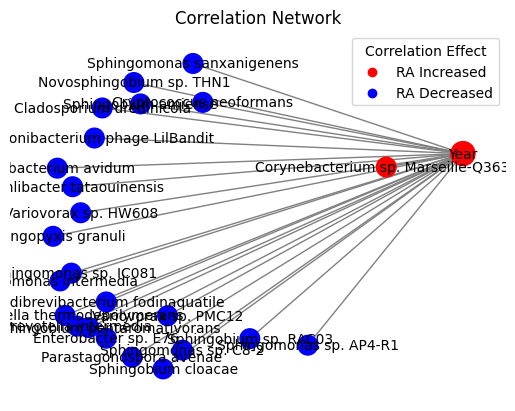

In [80]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


# Create a graph
G = nx.Graph()

# Add the 'Education_Level' node with default size
G.add_node('Year', size=300)

# Calculate Spearman correlation with each column from the second one
for column in merged_df5.columns[1:]:  # Skip the first column (Education_Level)
    correlation, p_value = spearmanr(merged_df5['Year'], merged_df5[column])
    
    # Print results
    print(f"Spearman correlation between Year and {column}: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}\n")
    
    # Only add the node and edge if the correlation is statistically significant
    if p_value < 0.05:
        # Add node for the column with size proportional to the logarithm of its number of entries
        G.add_node(column, size=200)  # Reduced size
        
        # Add an edge between Education_Level and the column
        G.add_edge('Year', column, weight=correlation)

# Position the nodes using a layout
pos = nx.spring_layout(G)

# Draw nodes with sizes based on the size attribute
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
node_colors = ['red' if node == 'Year' or (nx.get_edge_attributes(G, 'weight')[('Year', node)] > 0) else 'blue' for node in G.nodes()]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)

# Draw edges with default color and width
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Add legend
legend_labels = {
    'RA Increased': 'red',
    'RA Decreased': 'blue'
}
for label, color in legend_labels.items():
    plt.scatter([], [], c=color, label=label)
plt.legend(title='Correlation Effect')

# Show plot
plt.title("Correlation Network")
plt.axis('off')
plt.show()



Spearman correlation between Year and Genero: 0.018
P-value: 0.879

Spearman correlation between Year and CK_FEBRE: nan
P-value: nan

Spearman correlation between Year and CK_TOSSE: nan
P-value: nan

Spearman correlation between Year and CK_DOR_GARG: nan
P-value: nan

Spearman correlation between Year and CK_DIF_RESP: nan
P-value: nan

Spearman correlation between Year and CK_DIARREIA: nan
P-value: nan

Spearman correlation between Year and CK_VOMITO: nan
P-value: nan

Spearman correlation between Year and CK_CEFALEIA: nan
P-value: nan

Spearman correlation between Year and CK_CORIZA: nan
P-value: nan

Spearman correlation between Year and CK_ERUPCAO_CUT: nan
P-value: nan

Spearman correlation between Year and CK_MIALGIA: nan
P-value: nan

Spearman correlation between Year and CK_DOR_ABDOM: nan
P-value: nan

Spearman correlation between Year and CK_DOR_OSTEOMUSC: nan
P-value: nan

Spearman correlation between Year and CK_OUTROS: nan
P-value: nan

Spearman correlation between Year and C

/tmp/ipykernel_180348/251053727.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = spearmanr(merged_df5['Year'], merged_df5[column])


Spearman correlation between Year and Methylobacterium sp. DM1: 0.038
P-value: 0.749

Spearman correlation between Year and Methylobacterium sp. WL1: -0.059
P-value: 0.622

Spearman correlation between Year and Methylobacterium terrae: nan
P-value: nan

Spearman correlation between Year and Methylorubrum extorquens: nan
P-value: nan

Spearman correlation between Year and Methylorubrum populi: nan
P-value: nan

Spearman correlation between Year and Methylorubrum zatmanii: 0.148
P-value: 0.216

Spearman correlation between Year and Microbacterium pygmaeum: -0.059
P-value: 0.622

Spearman correlation between Year and Microbacterium sp. 4R-513: nan
P-value: nan

Spearman correlation between Year and Microbacterium sp. NY27: nan
P-value: nan

Spearman correlation between Year and Microbacterium sp. Se63.02b: -0.163
P-value: 0.173

Spearman correlation between Year and Microchaete diplosiphon: nan
P-value: nan

Spearman correlation between Year and Micrococcus antarcticus: nan
P-value: nan



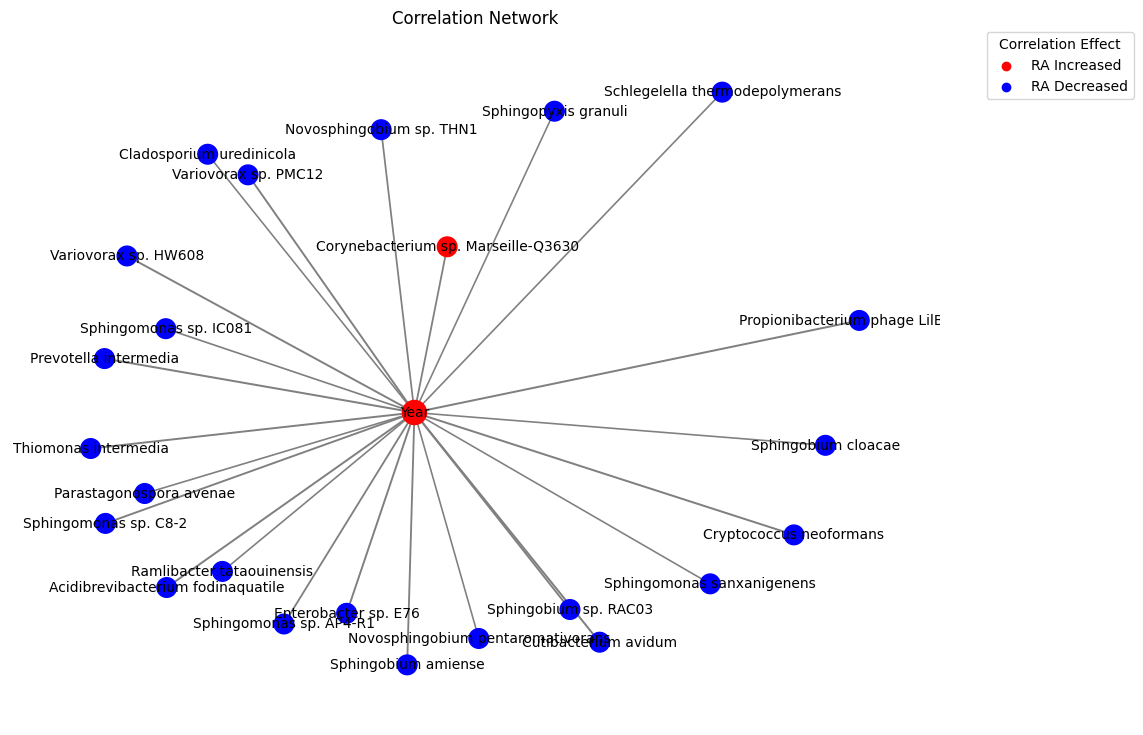

In [90]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a graph
G = nx.Graph()

# Add the 'Year' node with default size
G.add_node('Year', size=300)

# Calculate Spearman correlation with each column from the second one
for column in merged_df5.columns[1:]:  # Skip the first column (Year)
    correlation, p_value = spearmanr(merged_df5['Year'], merged_df5[column])
    
    # Print results
    print(f"Spearman correlation between Year and {column}: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}\n")
    
    # Only add the node and edge if the correlation is statistically significant
    if p_value < 0.05:
        # Add node for the column with size proportional to the logarithm of its number of entries
        G.add_node(column, size=200)  # Reduced size
        
        # Add an edge between Year and the column with correlation weight
        G.add_edge('Year', column, weight=correlation)

# Position the nodes using a layout
pos = nx.spring_layout(G, k=0.5)  # Adjust k to spread out nodes more
pos['Year'] = np.array([0, 0])  # Manually set the 'Year' node to the center

# Increase figure size for better spacing
plt.figure(figsize=(12, 9))

# Draw nodes with sizes based on the size attribute
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
node_colors = ['red' if node == 'Year' or (nx.get_edge_attributes(G, 'weight')[('Year', node)] > 0) else 'blue' for node in G.nodes()]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)

# Draw edges with width based on the absolute value of the correlation weight
edges = G.edges(data=True)
edge_weights = [abs(data['weight']) * 5 for _, _, data in edges]  # Scale factor for visibility

nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_weights)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Add legend
legend_labels = {
    'RA Increased': 'red',
    'RA Decreased': 'blue'
}
for label, color in legend_labels.items():
    plt.scatter([], [], c=color, label=label)
plt.legend(title='Correlation Effect', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show plot
plt.title("Correlation Network")
plt.axis('off')

# Save plot as PNG
plt.savefig('correlation_network.png', dpi=300, bbox_inches='tight')
plt.show()


In [272]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming merged_df2 is your DataFrame

# List of phenotype columns
phenotype_columns = ["Genero", "CK_FEBRE","CK_TOSSE","CK_DOR_GARG","CK_DIF_RESP","CK_DIARREIA","CK_VOMITO","CK_CEFALEIA","CK_CORIZA","CK_ERUPCAO_CUT","CK_MIALGIA","CK_DOR_ABDOM","CK_DOR_OSTEOMUSC","CK_OUTROS","CK_FRAQUEZA","CK_DOEN_CARDIO","CK_DOEN_NEURO","CK_Neoplasia_sólida_ou_hematologica","CK_DIABETES","CK_OBESIDADE","CK_DOEN_PULMOR","CK_DOEN_REL"]
# Dictionary to store the results
results = []

for phenotype in phenotype_columns:
    for column in merged_df5.columns:
        if column not in phenotype_columns:
            # Group by the current phenotype and get lists for each group
            groups = merged_df5.groupby(phenotype)[column].apply(list)
            # Filter out empty groups
            non_empty_groups = [group for group in groups if len(group) > 0]
            # Check if there are at least two non-empty groups
            if len(non_empty_groups) >= 2 and any(len(set(group)) > 1 for group in non_empty_groups):
                # Perform the Kruskal-Wallis test
                stat, p = mannwhitneyu(*non_empty_groups)
                # Check if the p-value is less than 0.05
                if p < 0.05:
                    # Store results in a list of dictionaries
                    results.append({
                        'Phenotype': phenotype,
                        'Column': column,
                        'Statistic': stat,
                        'P-value': p
                    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to TSV file
results_df.to_csv('mannwhitney_allspecies_0.05.tsv', sep='\t', index=False)

results_df

Phenotype                     Column  Statistic       P-value
0         Genero         Moraxella bovoculi      392.0  8.277655e-03
1         Genero  Moraxella nonliquefaciens      373.5  1.157569e-02
2         Genero      Sphingomonas sp. SL21      365.0  4.055685e-02
3         Genero     Staphylococcus hominis      392.0  8.277655e-03
4         Genero           Hannaella oryzae      392.0  8.277655e-03
..           ...                        ...        ...           ...
625  CK_DOEN_REL       Stenocarpella maydis        0.0  2.795137e-04
626  CK_DOEN_REL       Tropicoporus linteus        1.0  9.513937e-05
627  CK_DOEN_REL         Uwebraunia dekkeri        1.0  7.776085e-06
628  CK_DOEN_REL            Venturia effusa        0.0  8.277921e-04
629  CK_DOEN_REL          Zasmidium cellare        0.0  2.002317e-08

[630 rows x 4 columns]

In [273]:

bacteria_list = ["Betacoronavirus 1","Human rhinovirus sp.", "Human alphaherpesvirus 1", "Rhinovirus B","Primate bocaparvovirus 1","Totivirus sp.","Rotavirus A","Mastadenovius","Malassezia restricta","Exophiala xenobiotica","Aspergillus flavus","Fuscoporia contigua","Cryptococcus neoformans","Schizophyllum commune","Aspergillus penicillioides","Cladosporium herbarum","Aspergillus felis","Fusarium solani","Pneumocystis murina","Staphylococcus aureus","Moraxella catarrhalis","Haemophilus influenzae","Corynebacterium segmentosum","Streptococcus pneumoniae","Dolosigranulum pigrum","Acinetobacter dispersus","Neisseria mucosa","Eikenella corrodens","Prevotella intermedia","Cutibacterium acnes","Corynebacterium aurimucosum","Staphylococcus epidermidis","Acinetobacter johnsonii","Pseudomonas putida"]  # Replace with your actual column names

# Filtra el DataFrame para obtener solo las filas donde la columna 'Column' contiene alguna de las cadenas en bacteria_list
filtered_df = results_df[results_df["Column"].isin(bacteria_list)]

# Muestra el DataFrame filtrado
filtered_df.to_csv('mannwhitney_taxontarget_0.05.tsv', sep='\t', index=False)
filtered_df


Phenotype                       Column  Statistic       P-value
18           CK_TOSSE   Staphylococcus epidermidis      706.5  1.391045e-02
23        CK_DIF_RESP  Corynebacterium aurimucosum       71.0  6.049589e-03
40        CK_DIF_RESP   Staphylococcus epidermidis       52.0  4.573405e-02
44        CK_DIF_RESP      Cryptococcus neoformans       94.5  4.264572e-02
55        CK_DIF_RESP     Human alphaherpesvirus 1       91.5  1.224810e-04
129         CK_VOMITO          Eikenella corrodens      312.0  4.981624e-02
193       CK_CEFALEIA  Corynebacterium aurimucosum      519.0  1.021452e-03
198       CK_CEFALEIA        Dolosigranulum pigrum      535.0  1.251075e-02
218         CK_CORIZA        Exophiala xenobiotica      406.0  1.864531e-02
225        CK_MIALGIA        Moraxella catarrhalis      387.0  1.152953e-02
284  CK_DOR_OSTEOMUSC      Acinetobacter dispersus       62.0  7.722473e-06
320  CK_DOR_OSTEOMUSC        Prevotella intermedia       65.0  1.803937e-02
329         CK_OUTROS      Acinetobacter dispersus      120.0  6.583372e-04
351         CK_OUTROS        Dolosigranulum pigrum       80.0  2.364134e-02
360       CK_FRAQUEZA  Corynebacterium segmentosum      236.0  4.687052e-02
370       CK_FRAQUEZA           Pseudomonas putida      276.0  1.697844e-02
381       CK_FRAQUEZA          Fuscoporia contigua      306.0  7.069696e-03
405    CK_DOEN_CARDIO        Staphylococcus aureus       80.5  1.694990e-02
411    CK_DOEN_CARDIO            Aspergillus felis      147.5  2.051558e-03
429    CK_DOEN_CARDIO         Malassezia restricta       76.0  2.174783e-02
440    CK_DOEN_CARDIO          Pneumocystis murina      147.5  2.051558e-03
497       CK_DIABETES          Eikenella corrodens      147.5  2.051558e-03
508       CK_DIABETES           Pseudomonas putida      129.0  4.545089e-02
517       CK_DIABETES            Aspergillus felis      147.5  2.051558e-03
551       CK_DIABETES          Pneumocystis murina      147.5  2.051558e-03
580    CK_DOEN_PULMOR        Moraxella catarrhalis        2.0  8.831863e-03
582       CK_DOEN_REL      Acinetobacter johnsonii        2.0  6.667999e-04
592       CK_DOEN_REL           Pseudomonas putida        4.0  6.452966e-03
604       CK_DOEN_REL     Streptococcus pneumoniae        1.0  5.521329e-08
615       CK_DOEN_REL          Fuscoporia contigua        0.0  2.002317e-08

In [18]:
merge_df5 = pd.read_csv("alltaxonsp_phenotype.tsv", sep = '\t',index_col=0)
merge_df5

Genero  CK_FEBRE  CK_TOSSE  CK_DOR_GARG  CK_DIF_RESP  CK_DIARREIA  \
M396       0       1.0       0.0          0.0          0.0          0.0   
M458       1       0.0       0.0          0.0          0.0          0.0   
M407       0       1.0       1.0          0.0          0.0          1.0   
M448       0       1.0       1.0          1.0          0.0          0.0   
M443       0       0.0       0.0          0.0          0.0          0.0   
...      ...       ...       ...          ...          ...          ...   
M524       0       0.0       0.0          1.0          0.0          0.0   
M436       0       0.0       1.0          1.0          0.0          0.0   
M431       1       0.0       1.0          1.0          0.0          0.0   
M379       0       0.0       0.0          0.0          0.0          0.0   
M526       0       NaN       NaN          NaN          NaN          NaN   

      CK_VOMITO  CK_CEFALEIA  CK_CORIZA  CK_ERUPCAO_CUT  ...  \
M396        1.0          1.0        0.0             0.0  ...   
M458        0.0          1.0        1.0             0.0  ...   
M407        1.0          1.0        0.0             0.0  ...   
M448        1.0          1.0        1.0             0.0  ...   
M443        1.0          1.0        0.0             0.0  ...   
...         ...          ...        ...             ...  ...   
M524        0.0          1.0        0.0             0.0  ...   
M436        0.0          1.0        1.0             0.0  ...   
M431        0.0          1.0        1.0             0.0  ...   
M379        0.0          0.0        1.0             0.0  ...   
M526        NaN          NaN        NaN             NaN  ...   

      Staphylococcus phage Sebago  Staphylococcus phage StauST398-3  \
M396                      0.00000                          0.000000   
M458                      0.00000                          0.003968   
M407                      0.00000                          0.000000   
M448                      0.00000                          0.000000   
M443                      0.00000                          0.000000   
...                           ...                               ...   
M524                      0.00000                          0.000000   
M436                      0.00000                          0.000000   
M431                      0.00012                          0.000000   
M379                      0.00000                          0.000000   
M526                      0.00000                          0.000000   

      Staphylococcus phage StauST398-4  Staphylococcus virus 69  \
M396                          0.000000                 0.000000   
M458                          0.000683                 0.000000   
M407                          0.000000                 0.000000   
M448                          0.000000                 0.000000   
M443                          0.000000                 0.000000   
...                                ...                      ...   
M524                          0.000000                 0.000000   
M436                          0.000000                 0.000000   
M431                          0.000000                 0.000049   
M379                          0.000000                 0.000000   
M526                          0.000000                 0.000000   

      Staphylococcus virus 92  Staphylococcus virus 96  \
M396                 0.000000                 0.000000   
M458                 0.000000                 0.000000   
M407                 0.000000                 0.000000   
M448                 0.000000                 0.000000   
M443                 0.000000                 0.000000   
...                       ...                      ...   
M524                 0.000000                 0.000000   
M436                 0.000000                 0.000000   
M431                 0.000047                 0.000049   
M379                 0.000000                 0.000000   
M526                 0.000000           

mannwhitney test statistic: 147.5, p-value: 0.0020515581015106404


/tmp/ipykernel_180348/3347837911.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


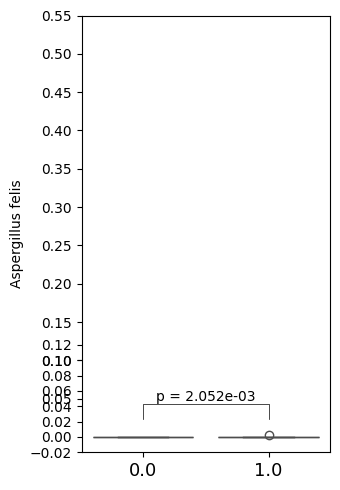

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Perform test
groups = merged_df5.groupby('CK_DOEN_CARDIO')['Aspergillus felis'].apply(list)
stat, p = mannwhitneyu(*groups)
print(f"mannwhitney test statistic: {stat}, p-value: {p}")

# Create boxplot
plt.figure(figsize=(3.5, 5))
ax = sns.boxplot(
    x='CK_DOEN_CARDIO', 
    y='Aspergillus felis', 
    data=merged_df5, 
    palette={'1.0': 'orange', '0.0': 'gray'}
)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=10)

# Remove the x-axis title
ax.set_xlabel('')

# Adjust the y-axis limits and ticks for better resolution
ax.set_ylim(0, 0.5)  # Set the limits of the y-axis to focus on 0 to 0.5
# Define the tick positions with higher density from 0 to 0.1
y_ticks = list(plt.MultipleLocator(0.02).tick_values(0, 0.1)) + list(plt.MultipleLocator(0.05).tick_values(0.1, 0.5))
ax.set_yticks(y_ticks)

# Annotate p-value
x1, x2 = 0, 1  # Positions for the lines
y, h, col = merged_df5['Aspergillus felis'].max() + 0.02, 0.02, 'k'  # y position and height of the lines
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=0.5, c=col)
plt.text((x1 + x2) * .5, y + h, f'p = {p:.3e}', ha='center', va='bottom', color=col, fontsize=10)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('boxplot_Aspergillus felis.png', dpi=300, bbox_inches='tight')

plt.show()

In [25]:
groups = merged_df5.groupby('CK_DOEN_CARDIO')['Aspergillus felis'].apply(list)
groups

CK_DOEN_CARDIO
0.0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1.0     [0.0, 0.0, 0.0, 0.0, 0.0030264596544937678, 0.0]
Name: Aspergillus felis, dtype: object

mannwhitney test statistic: 71.0, p-value: 0.006049589429074487


/tmp/ipykernel_180348/110403598.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


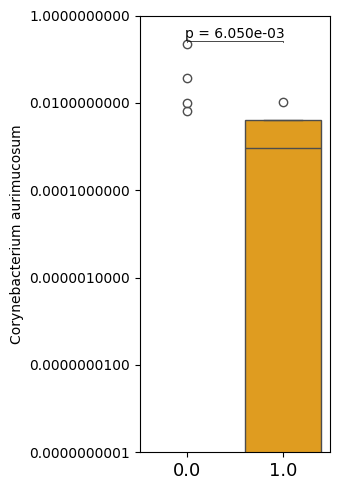

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Perform test
groups = merged_df5.groupby('CK_DIF_RESP')['Corynebacterium aurimucosum'].apply(list)
stat, p = mannwhitneyu(*groups)
print(f"mannwhitney test statistic: {stat}, p-value: {p}")

# Create boxplot
plt.figure(figsize=(3.5, 5))
ax = sns.boxplot(
    x='CK_DIF_RESP', 
    y='Corynebacterium aurimucosum', 
    data=merged_df5, 
    palette={'1.0': 'orange', '0.0': 'gray'}
)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=10)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Remove the x-axis title
ax.set_xlabel('')

# Adjust the y-axis limits and ticks for better resolution
ax.set_ylim(1e-10, 1)  # Start the y-axis from 0.001 (1e-3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.10f}'.format(y)))

# Annotate p-value
x1, x2 = 0, 1  # Positions for the lines
y, h, col = merged_df5['Corynebacterium aurimucosum'].max() * 1.1, 0.02, 'k'  # y position and height of the lines
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=0.5, c=col)
plt.text((x1 + x2) * .5, y + h, f'p = {p:.3e}', ha='center', va='bottom', color=col, fontsize=10)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('boxplot_Corynebacterium_aurimucosum.png', dpi=300, bbox_inches='tight')

plt.show()


Mann-Whitney test statistic for Corynebacterium aurimucosum: 71.0, p-value: 0.006049589429074487
Mann-Whitney test statistic for Staphylococcus epidermidis: 52.0, p-value: 0.04573404629235731
Mann-Whitney test statistic for Cryptococcus neoformans: 94.5, p-value: 0.04264572133564552


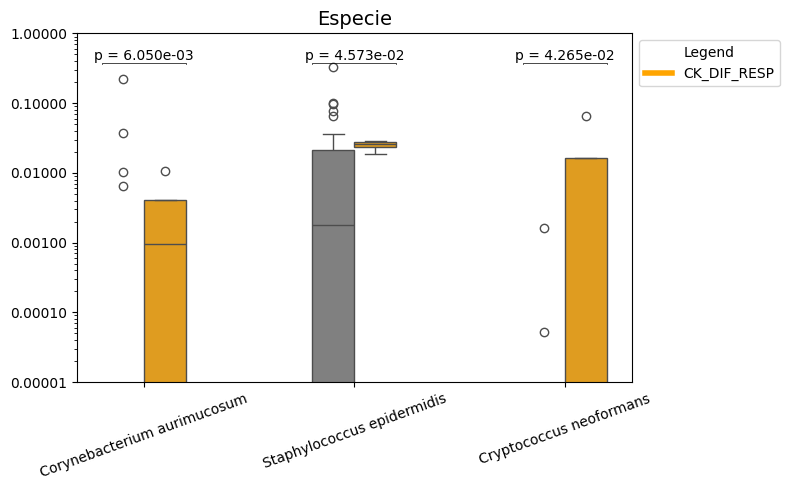

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Lista de bactérias para plotagem
bacteria_list = ['Corynebacterium aurimucosum', 'Staphylococcus epidermidis', 'Cryptococcus neoformans']

# Converter o DataFrame para o formato longo
df_long = pd.melt(
    merged_df5,
    id_vars=['CK_DIF_RESP'],
    value_vars=bacteria_list,
    var_name='Bacteria',
    value_name='Value'
)

# Criar boxplot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    x='Bacteria', 
    y='Value', 
    hue='CK_DIF_RESP',
    data=df_long,
    palette={1.0: 'orange', 0.0: 'gray'},
    width=0.4  # Reduzir a largura dos boxplots
)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Remove the x-axis title and y-axis label
ax.set_xlabel('')
ax.set_ylabel('')

# Add title
ax.set_title('Especie', fontsize=14)

# Adjust the y-axis limits
ax.set_ylim(1e-5, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.5f}'.format(y)))

# Rotate y-axis labels
plt.xticks(rotation=20)

# Annotate p-values
p_values = {}
for bacteria in bacteria_list:
    groups = merged_df5.groupby('CK_DIF_RESP')[bacteria].apply(list)
    stat, p = mannwhitneyu(*groups)
    p_values[bacteria] = p
    print(f"Mann-Whitney test statistic for {bacteria}: {stat}, p-value: {p}")

# Add annotations
y, h, col = merged_df5[bacteria_list].max().max() * 1.1, 0.02, 'k'  # Use the overall max
for i, bacteria in enumerate(bacteria_list):
    x1, x2 = i - 0.2, i + 0.2
    plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=0.5, c=col)
    plt.text(i, y + h, f'p = {p_values[bacteria]:.3e}', ha='center', va='bottom', color=col, fontsize=10)

# Add custom legend
# Create a custom legend with only the positive CK_DIF_RESP
handles = [plt.Line2D([0], [0], color='orange', lw=4)]
labels = ['CK_DIF_RESP']
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('boxplot_multiple_bacteria.png', dpi=300, bbox_inches='tight')

plt.show()



Mann-Whitney test statistic for Acinetobacter johnsonii: 2.0, p-value: 0.0006667998790615701
Mann-Whitney test statistic for Pseudomonas putida: 4.0, p-value: 0.00645296585663335
Mann-Whitney test statistic for Streptococcus pneumoniae: 1.0, p-value: 5.521328981936076e-08
Mann-Whitney test statistic for Fuscoporia contigua: 0.0, p-value: 2.002317182868681e-08


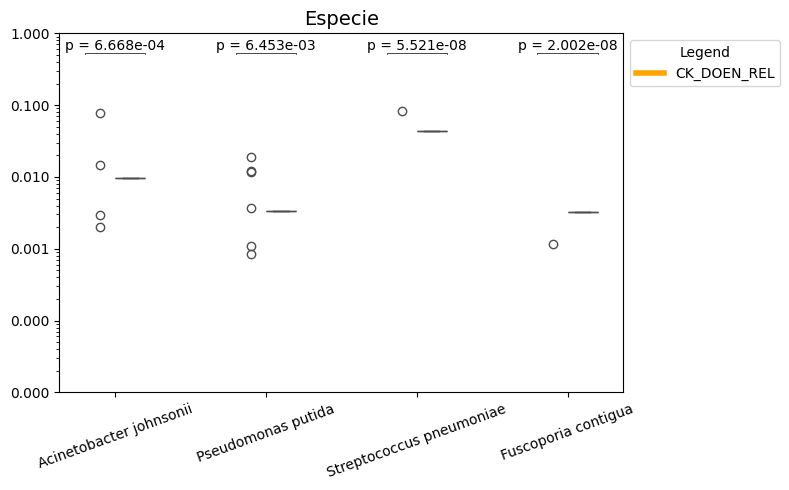

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Lista de bactérias para plotagem
bacteria_list = ['Acinetobacter johnsonii', 'Pseudomonas putida', 'Streptococcus pneumoniae','Fuscoporia contigua']

# Converter o DataFrame para o formato longo
df_long = pd.melt(
    merged_df5,
    id_vars=['CK_DOEN_REL'],
    value_vars=bacteria_list,
    var_name='Bacteria',
    value_name='Value'
)

# Criar boxplot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    x='Bacteria', 
    y='Value', 
    hue='CK_DOEN_REL',
    data=df_long,
    palette={1.0: 'orange', 0.0: 'gray'},
    width=0.4  # Reduzir a largura dos boxplots
)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Remove the x-axis title and y-axis label
ax.set_xlabel('')
ax.set_ylabel('')

# Add title
ax.set_title('Especie', fontsize=14)

# Adjust the y-axis limits
ax.set_ylim(1e-5, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.3f}'.format(y)))

# Rotate y-axis labels
plt.xticks(rotation=20)

# Annotate p-values
p_values = {}
for bacteria in bacteria_list:
    groups = merged_df5.groupby('CK_DOEN_REL')[bacteria].apply(list)
    stat, p = mannwhitneyu(*groups)
    p_values[bacteria] = p
    print(f"Mann-Whitney test statistic for {bacteria}: {stat}, p-value: {p}")

# Add annotations
y, h, col = merged_df5[bacteria_list].max().max() * 1.1, 0.02, 'k'  # Use the overall max
for i, bacteria in enumerate(bacteria_list):
    x1, x2 = i - 0.2, i + 0.2
    plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=0.5, c=col)
    plt.text(i, y + h, f'p = {p_values[bacteria]:.3e}', ha='center', va='bottom', color=col, fontsize=10)

# Add custom legend
# Create a custom legend with only the positive CK_DIF_RESP
handles = [plt.Line2D([0], [0], color='orange', lw=4)]
labels = ['CK_DOEN_REL']
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('boxplot_CK_DOEN_REL_bacteria.png', dpi=300, bbox_inches='tight')

plt.show()



In [275]:
#Import metadata
metadata = pd.read_csv("metadata.tsv", sep = '\t', index_col=0)
metadata.index = metadata.index.astype(str)
metadata

Groups Groups_RV   RV
Samples                         
M390      Group I   Group I  -RV
M511      Group I   Group I  -RV
M353      Group I   Group I  -RV
M484      Group I   Group I  -RV
M442      Group I   Group I  -RV
...           ...       ...  ...
M443     Group II  Group II  -RV
M479     Group II  Group II  -RV
M458     Group II  Group II  -RV
M407     Group II  Group II  -RV
M431     Group II  Group II  -RV

[72 rows x 3 columns]

In [276]:
merged_df = pd.merge(metadata, metadata2, left_index=True, right_index=True)
merged_df

Groups Groups_RV   RV  Genero  CK_FEBRE  CK_TOSSE  CK_DOR_GARG  \
Samples                                                                     
M390      Group I   Group I  -RV       0       0.0       0.0          1.0   
M511      Group I   Group I  -RV       1       NaN       NaN          NaN   
M353      Group I   Group I  -RV       0       0.0       1.0          1.0   
M484      Group I   Group I  -RV       0       1.0       1.0          1.0   
M442      Group I   Group I  -RV       0       0.0       0.0          0.0   
...           ...       ...  ...     ...       ...       ...          ...   
M443     Group II  Group II  -RV       0       0.0       0.0          0.0   
M479     Group II  Group II  -RV       0       0.0       1.0          1.0   
M458     Group II  Group II  -RV       1       0.0       0.0          0.0   
M407     Group II  Group II  -RV       0       1.0       1.0          0.0   
M431     Group II  Group II  -RV       1       0.0       1.0          1.0   

         CK_DIF_RESP  CK_DIARREIA  CK_VOMITO  ...  CK_DOR_OSTEOMUSC  \
Samples                                       ...                     
M390             0.0          0.0        1.0  ...               0.0   
M511             NaN          NaN        NaN  ...               NaN   
M353             0.0          0.0        0.0  ...               0.0   
M484             0.0          0.0        1.0  ...               0.0   
M442             0.0          1.0        0.0  ...               0.0   
...              ...          ...        ...  ...               ...   
M443             0.0          0.0        1.0  ...               0.0   
M479             0.0          0.0        0.0  ...               0.0   
M458             0.0          0.0        0.0  ...               0.0   
M407             0.0          1.0        1.0  ...               0.0   
M431             0.0          0.0        0.0  ...               0.0   

         CK_OUTROS  CK_FRAQUEZA  CK_DOEN_CARDIO  CK_DOEN_NEURO  \
Samples                                                          
M390           1.0          1.0             0.0            0.0   
M511           NaN          NaN             NaN            NaN   
M353           0.0          0.0             0.0            0.0   
M484           1.0          0.0             0.0            0.0   
M442           0.0          0.0             1.0            0.0   
...            ...          ...             ...            ...   
M443           0.0          0.0             0.0            0.0   
M479           0.0          1.0             0.0            0.0   
M458           0.0          0.0             0.0            0.0   
M407           0.0          0.0             0.0            0.0   
M431           0.0          0.0             0.0            0.0   

         CK_Neoplasia_sólida_ou_hematologica  CK_DIABETES  CK_OBESIDADE  \
Samples                                                                   
M390                                     0.0          0.0           0.0   
M511                                     NaN          NaN           NaN   
M353                                     0.0          0.0           0.0   
M484                                     0.0          0.0           0.0   
M442                                     0.0          1.0           0.0   
...                                      ...          ...           ...   
M443                                     0.0          1.0           0.0   
M479                                     0.0          0.0           0.0   
M458                                     0.0          0.0           0.0   
M407                                     0.0          0.0           0.0   
M431                                     0.0          0.0           0.0   

         CK_DOEN_PULMOR  CK_DOEN_REL  
Samples                               
M390                0.0          0.0  
M511                NaN          NaN  
M353                0.0          0.0  
M484                0.0          0.0  
M442            

In [282]:
contingency_table = pd.crosstab(merged_df["Genero"], merged_df["Groups"])
contingency_table

Groups  Group I  Group II
Genero                   
0            23        33
1             7         9

In [283]:
import numpy as np
from scipy.stats import chi2_contingency

chi = chi2_contingency(contingency_table)
chi

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[23.33333333, 32.66666667],
       [ 6.66666667,  9.33333333]]))

In [281]:
# prompt: crear bucle con chi cuadrado para todas las columnas del tabla df_ps
colunasdados = list(merged_df.columns)
matrixamr = merged_df[colunasdados[2:]]
matrixamr

import pandas as pd
chi_square_results = {}
for column in matrixamr.columns:
  contingency_table = pd.crosstab(merged_df["Groups"], matrixamr[column])
  chi_square_results[column] = chi2_contingency(contingency_table)[1]

# Print the results
for column, p_value in chi_square_results.items():
  if p_value < 1:
    print(f"El test de Chi-square '{column}': p-value = {p_value}")

El test de Chi-square 'RV': p-value = 0.13651560550698988
El test de Chi-square 'CK_FEBRE': p-value = 0.5179390376978645
El test de Chi-square 'CK_TOSSE': p-value = 0.38927640299609334
El test de Chi-square 'CK_DOR_GARG': p-value = 0.7191117659961597
El test de Chi-square 'CK_DIARREIA': p-value = 0.3015322395060801
El test de Chi-square 'CK_VOMITO': p-value = 0.8493964012747895
El test de Chi-square 'CK_CEFALEIA': p-value = 0.45389097490058683
El test de Chi-square 'CK_CORIZA': p-value = 0.1674341844926085
El test de Chi-square 'CK_MIALGIA': p-value = 0.7947031408746148
El test de Chi-square 'CK_DOR_ABDOM': p-value = 0.3359750094114467
El test de Chi-square 'CK_DOR_OSTEOMUSC': p-value = 0.3982890791952136
El test de Chi-square 'CK_FRAQUEZA': p-value = 0.9508902726865909
El test de Chi-square 'CK_DOEN_CARDIO': p-value = 0.9302994833728814
El test de Chi-square 'CK_DOEN_NEURO': p-value = 0.8370153501122131
El test de Chi-square 'CK_DIABETES': p-value = 0.9302994833728814
El test de Chi-s

In [113]:
from scipy.stats import kruskal

groups = merged_df.groupby('Groups')['CK_FEBRE'].apply(list)

# Perform the Kruskal-Wallis test
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

Kruskal-Wallis test statistic: nan, p-value: nan


In [21]:
results = {
    'Sample': [],
    'Chao1': [],
    'Shannon': [],
    'Simpson': [],
    'Otus': []
}

for column in bacteria2.columns[0:]:
    chao1_value = chao1(bacteria2[column])
    simpson_value = simpson(bacteria2[column])
    observed_otus_value = observed_otus(bacteria2[column])
    shannon_value = -(np.log(bacteria2[column].div(bacteria2[column].sum())).mul(bacteria2[column].div(bacteria2[column].sum()))).sum()
    #print(chao1_value)
    results['Sample'].append(column)
    results['Chao1'].append(chao1_value)
    results['Shannon'].append(shannon_value)
    results['Simpson'].append(simpson_value)
    results['Otus'].append(observed_otus_value)
    #print(column)
    #print(chao1_value)
    #print(results)

# Criar DataFrame com os resultados
df_results0 = pd.DataFrame(results)

# Arredondar os valores
df_results0 = df_results0.round(2)

# Salvar os resultados em um arquivo
df_results0.to_csv('alfa_bacteria.tsv', index=True, sep='\t')
df_results0


/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/util/_warning.py:60: UserWarning: observed_otus is deprecated as of 0.6.0.
  warn(f"{func.__name__} is deprecated as of {ver}.")
/home/raquel/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Sample  Chao1  Shannon  Simpson  Otus
0    M352   93.0     3.33     0.93    93
1    M420   74.0     3.17     0.91    74
2    M485   56.0     3.11     0.91    56
3    M353   42.0     2.94     0.92    42
4    M474   59.0     2.61     0.85    59
..    ...    ...      ...      ...   ...
67   M431    5.0     0.20     0.08     5
68   M452    7.0     1.33     0.68     7
69   M448    7.0     1.48     0.72     7
70   M428   10.0     1.66     0.70    10
71   M490    4.0     0.51     0.28     4

[72 rows x 5 columns]

In [23]:
# import useful library
import numpy as np
from scipy.stats import shapiro
from numpy.random import randn
# Create data
gfg_data =  df["M420"]
gfg_data
# cnduct the  Shapiro-Wilk Test
shapiro(gfg_data)[1]

2.173387566382894e-44

In [24]:
# prompt: crear bucle con chi cuadrado para todas las columnas del tabla df_ps

import pandas as pd
shapiro_results = {}
for column in df.columns:
  #shapiro(gfg_data)
  shapiro_results[column] = shapiro(df[column])[1]

# Print the results
for column, p_value in shapiro_results.items():
  if p_value < 0.05:
    print(f"El test de Shapiro '{column}': p-value = {p_value}")

El test de Shapiro 'M352': p-value = 4.012106767514199e-44
El test de Shapiro 'M420': p-value = 2.173387566382894e-44
El test de Shapiro 'M485': p-value = 1.768869148727242e-44
El test de Shapiro 'M353': p-value = 1.2728713190471948e-45
El test de Shapiro 'M474': p-value = 2.853521026747137e-45
El test de Shapiro 'M435': p-value = 1.5823153396933056e-44
El test de Shapiro 'M480': p-value = 8.464248555188316e-45
El test de Shapiro 'M318': p-value = 1.2140723147088014e-45
El test de Shapiro 'M487': p-value = 7.239855824119567e-45
El test de Shapiro 'M396': p-value = 3.2986593635601786e-45
El test de Shapiro 'M516': p-value = 5.956346284944163e-45
El test de Shapiro 'M449': p-value = 2.1704912097242356e-45
El test de Shapiro 'M374': p-value = 3.203946054065109e-45
El test de Shapiro 'M529': p-value = 3.529570798479522e-45
El test de Shapiro 'M444': p-value = 6.002360862776418e-45
El test de Shapiro 'M373': p-value = 1.3427265258134216e-44
El test de Shapiro 'M357': p-value = 6.16921518417

In [25]:
df_bray = df.T
# Transform relative abundance with Calculate row sums
row_sums = df_bray.sum(axis=1)
df_bray2 = df_bray.div(row_sums, axis=0)
df_bray2

Genus  Achromobacter  Acidibrevibacterium  Acidovorax  Acinetobacter  \
M352        0.001919             0.005813    0.007026       0.003206   
M420        0.001216             0.000000    0.001881       0.002029   
M485        0.005351             0.002296    0.007102       0.018018   
M353        0.000000             0.000000    0.000995       0.002021   
M474        0.001931             0.000000    0.007315       0.021125   
...              ...                  ...         ...            ...   
M431        0.000000             0.000000    0.000000       0.000000   
M452        0.000000             0.000000    0.000000       0.000000   
M448        0.000000             0.000000    0.000000       0.000000   
M428        0.000000             0.000000    0.000000       0.000000   
M490        0.000000             0.000000    0.000000       0.834420   

Genus  Actinoalloteichus  Actinomyces  Actinomycetospora  Actinoplanes  \
M352            0.008753          0.0           0.008307           0.0   
M420            0.001487          0.0           0.000000           0.0   
M485            0.000000          0.0           0.000000           0.0   
M353            0.000000          0.0           0.000000           0.0   
M474            0.000000          0.0           0.000000           0.0   
...                  ...          ...                ...           ...   
M431            0.000000          0.0           0.000000           0.0   
M452            0.000000          0.0           0.000000           0.0   
M448            0.000000          0.0           0.000000           0.0   
M428            0.000000          0.0           0.000000           0.0   
M490            0.000000          0.0           0.000000           0.0   

Genus  Actinosynnema  Adhaeribacter  ...  Tobamovirus  Torbevirus  Totivirus  \
M352        0.001857            0.0  ...          0.0         0.0        0.0   
M420        0.000000            0.0  ...          0.0         0.0        0.0   
M485        0.000000            0.0  ...          0.0         0.0        0.0   
M353        0.000000            0.0  ...          0.0         0.0        0.0   
M474        0.000000            0.0  ...          0.0         0.0        0.0   
...              ...            ...  ...          ...         ...        ...   
M431        0.000000            0.0  ...          0.0         0.0        0.0   
M452        0.000000            0.0  ...          0.0         0.0        0.0   
M448        0.000000            0.0  ...          0.0         0.0        0.0   
M428        0.000000            0.0  ...          0.0         0.0        0.0   
M490        0.000000            0.0  ...          0.0         0.0        0.0   

Genus  Varicellovirus  Webervirus  Andhravirus  Biseptimavirus  Pahexavirus  \
M352              0.0         0.0          0.0             0.0     0.000000   
M420              0.0         0.0          0.0             0.0     0.000000   
M485              0.0         0.0          0.0             0.0     0.024012   
M353              0.0         0.0          0.0             0.0     0.000000   
M474              0.0         0.0          0.0             0.0     0.000000   
...               ...         ...          ...             ...          ...   
M431              0.0         0.0          0.0             0.0     0.000000   
M452              0.0         0.0          0.0             0.0     0.000000   
M448              0.0         0.0          0.0             0.0     0.000000   
M428              0.0         0.0          0.0             0.0     0.000000   
M490              0.0         0.0          0.0             0.0     0.000000   

Genus  Phietavirus  Sextaecvirus  
M352      0.000000           0.0  
M420      0.000000           0.0  
M485      0.000000           0.0  
M353      0.000000           0.0  
M474      0.000000           0.0  
...            ...           ...  
M431      0.000332           0.0  
M452      0.000000           0.0  
M448      0.000000   

Samples    Groups Groups_RV   RV
Samples                                 
M485       M485   Group I   Group I  -RV
M471       M471   Group I   Group I  -RV
M367       M367   Group I   Group I  -RV
M388       M388   Group I   Group I  -RV
M372       M372   Group I   Group I  -RV
...         ...       ...       ...  ...
M359       M359   Group I   Group I  -RV
M448       M448  Group II  Group II  -RV
M435       M435  Group II  Group II  -RV
M441       M441  Group II  Group II  -RV
M507       M507   Group I   Group I  -RV

[72 rows x 4 columns]

In [28]:
results = {
    'Sample': [],
    'Chao1': [],
    'Shannon': [],
    'Simpson': [],
    'Otus': []
}

for column in df.columns[0:]:
    chao1_value = chao1(df[column])
    simpson_value = simpson(df[column])
    observed_otus_value = observed_otus(df[column])
    shannon_value = -(np.log(df[column].div(df[column].sum())).mul(df[column].div(df[column].sum()))).sum()
    #print(chao1_value)
    results['Sample'].append(column)
    results['Chao1'].append(chao1_value)
    results['Shannon'].append(shannon_value)
    results['Simpson'].append(simpson_value)
    results['Otus'].append(observed_otus_value)
    #print(column)
    #print(chao1_value)
    #print(results)

# Criar DataFrame com os resultados
df_results = pd.DataFrame(results)

# Arredondar os valores
df_results = df_results.round(2)

# Salvar os resultados em um arquivo
df_results.to_csv('alfa_alltaxon.tsv', index=True, sep='\t')


/home/raquel/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [206]:

# Eliminar filas in-place usando los nombres de los índices
#df_results.drop(['M388', 'M530',"M407","M393","M413","M359","M367"], inplace=True)
#df_results

KeyError: "['M388', 'M530', 'M407', 'M393', 'M413', 'M359', 'M367'] not found in axis"

In [29]:
df_results.set_index('Sample', inplace=True)
df_results

Chao1  Shannon  Simpson  Otus
Sample                               
M352    144.0     3.63     0.94   144
M420    136.0     3.51     0.93   136
M485     77.0     3.29     0.92    77
M353    115.0     2.53     0.81   115
M474     96.0     2.86     0.87    96
...       ...      ...      ...   ...
M431     17.0     0.24     0.09    17
M452      8.0     1.43     0.70     8
M448      7.0     1.48     0.72     7
M428     10.0     1.66     0.70    10
M490      4.0     0.51     0.28     4

[72 rows x 4 columns]

/tmp/ipykernel_115760/639309961.py:15: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=df_results[['Chao1']], ax=axes[0], palette=custom_palette)
/tmp/ipykernel_115760/639309961.py:20: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=df_results[['Shannon']], ax=axes[1], palette=custom_palette)
/tmp/ipykernel_115760/639309961.py:25: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=df_results[['Simpson']], ax=axes[2], palette=custom_palette)


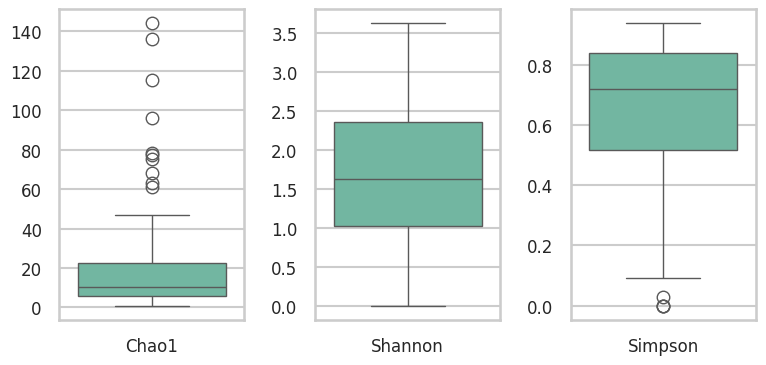

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#RESULTADO APARTIR DE FREQUENCIA RELATIVA
#Configurar o estilo do seaborn
# Configurar o estilo do Seaborn
sns.set(style="whitegrid", context="talk")

# Definir uma paleta de cores personalizada
custom_palette = sns.color_palette("Set2")
# Criar a figura com uma linha e três colunas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# Gerar boxplots para cada coluna
sns.boxplot(data=df_results[['Chao1']], ax=axes[0], palette=custom_palette)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)


sns.boxplot(data=df_results[['Shannon']], ax=axes[1], palette=custom_palette)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)


sns.boxplot(data=df_results[['Simpson']], ax=axes[2], palette=custom_palette)
axes[2].tick_params(axis='x', labelsize=12)
axes[2].tick_params(axis='y', labelsize=12)


# Ajustar o layout
plt.tight_layout()

# Salvar os gráficos
fig.savefig('boxplots_bacteria.png', format='png')
fig.savefig('boxplots_bacteria.svg', format='svg')

# Exibir os gráficos
plt.show()

In [31]:

import pandas as pd
shapiro_results = {}
for column in df_results.columns:
  #shapiro(gfg_data)
  shapiro_results[column] = shapiro(df_results[column])[1]

# Print the results
for column, p_value in shapiro_results.items():
  if p_value < 0.05:
    print(f"El test de shapiro '{column}': p-value = {p_value}")

El test de shapiro 'Chao1': p-value = 7.206104629454431e-12
El test de shapiro 'Simpson': p-value = 1.2154565503868147e-06
El test de shapiro 'Otus': p-value = 7.206104629454431e-12


In [57]:
#Import metadata
metadata = pd.read_csv("metadata.tsv", sep = '\t', index_col=0)
metadata.index.name = None
metadata.index = metadata.index.astype(str)
metadata

Groups Groups_RV   RV
M390   Group I   Group I  -RV
M511   Group I   Group I  -RV
M353   Group I   Group I  -RV
M484   Group I   Group I  -RV
M442   Group I   Group I  -RV
...        ...       ...  ...
M443  Group II  Group II  -RV
M479  Group II  Group II  -RV
M458  Group II  Group II  -RV
M407  Group II  Group II  -RV
M431  Group II  Group II  -RV

[72 rows x 3 columns]

In [211]:
# Eliminar filas in-place usando los nombres de los índices
#metadata.drop(['M388', 'M530',"M407","M393","M413","M359","M367"], inplace=True)
#metadata

In [58]:
dfinal = pd.merge(df_results, metadata[["RV"]], left_index=True, right_index=True, how='outer')
dfinal 

Chao1  Shannon  Simpson  Otus   RV
M318   61.0     2.41     0.80    61  -RV
M352  144.0     3.63     0.94   144  -RV
M353  115.0     2.53     0.81   115  -RV
M357   75.0     3.48     0.94    75  -RV
M359   10.0     1.59     0.68    10  -RV
...     ...      ...      ...   ...  ...
M517   22.0     2.35     0.86    22  -RV
M524   13.0     2.08     0.84    13  -RV
M526    6.0     0.10     0.03     6  +RV
M529   26.0     2.58     0.87    26  -RV
M530    5.0     0.90     0.50     5  +RV

[72 rows x 5 columns]

In [35]:
from scipy.stats import kruskal

groups = dfinal.groupby('RV')['Otus'].apply(list)

# Perform the Kruskal-Wallis test
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

Kruskal-Wallis test statistic: 0.3456870392468783, p-value: 0.5565648056850343


Kruskal-Wallis test statistic: 2.4738432295828843, p-value: 0.11575457782100564


/tmp/ipykernel_115760/301593935.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='RV', y='Shannon', data=dfinal, palette={'+RV': '#018571', '-RV': 'gray'})


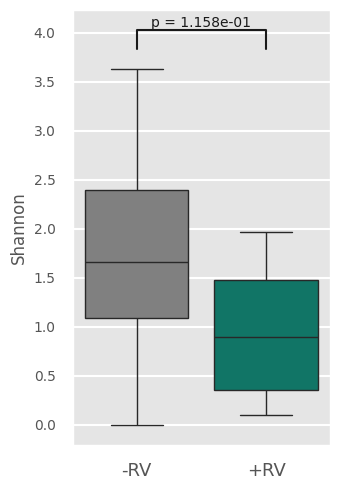

In [59]:

# Perform Kruskal-Wallis test
groups = dfinal.groupby('RV')['Shannon'].apply(list)
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

# Create boxplot
plt.figure(figsize=(3.5, 5))
ax = sns.boxplot(x='RV', y='Shannon', data=dfinal, palette={'+RV': '#018571', '-RV': 'gray'})
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=10)

# Remove the x-axis title
ax.set_xlabel('')

# Annotate p-value
x1, x2 = 0, 1  # Positions for the lines
y, h, col = dfinal['Shannon'].max() + 0.2, 0.2, 'k'  # y position and height of the lines
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, f'p = {p:.3e}', ha='center', va='bottom', color=col,fontsize=10)
# Ajustar o layout
plt.tight_layout()

# Save the plot
plt.savefig('boxplot_shannon.png', dpi=300, bbox_inches='tight')

plt.show()

Kruskal-Wallis test statistic: 0.3456870392468783, p-value: 0.5565648056850343


/tmp/ipykernel_115760/985016777.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='RV', y='Chao1', data=dfinal, palette={'+RV': '#018571', '-RV': 'gray'})


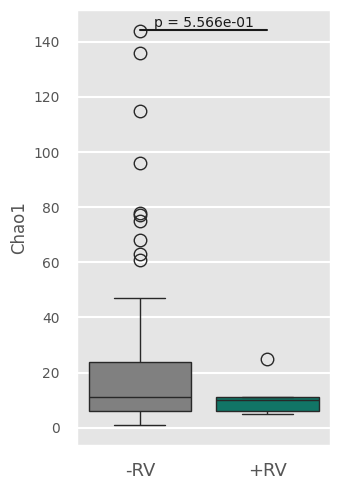

In [60]:

# Perform Kruskal-Wallis test
groups = dfinal.groupby('RV')['Chao1'].apply(list)
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

# Create boxplot
plt.figure(figsize=(3.5, 5))
ax = sns.boxplot(x='RV', y='Chao1', data=dfinal, palette={'+RV': '#018571', '-RV': 'gray'})
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=10)

# Remove the x-axis title
ax.set_xlabel('')

# Annotate p-value
x1, x2 = 0, 1  # Positions for the lines
y, h, col = dfinal['Chao1'].max() + 0.2, 0.2, 'k'  # y position and height of the lines
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, f'p = {p:.3e}', ha='center', va='bottom', color=col,fontsize=10)
# Ajustar o layout
plt.tight_layout()

# Salvar os gráficos
plt.savefig('boxplot_chao1.png', dpi=300, bbox_inches='tight')


plt.show()

Kruskal-Wallis test statistic: 3.759681079718044, p-value: 0.05250259164180422


/tmp/ipykernel_115760/1488008998.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='RV', y='Simpson', data=dfinal, palette={'+RV': '#018571', '-RV': 'gray'})


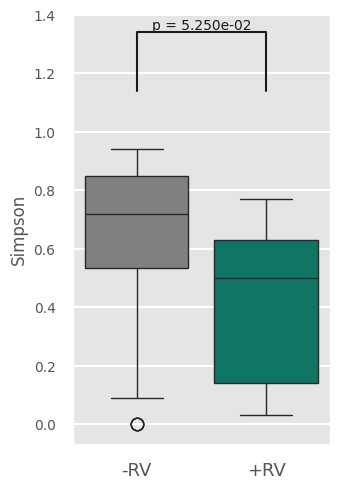

In [61]:

# Perform Kruskal-Wallis test
groups = dfinal.groupby('RV')['Simpson'].apply(list)
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

# Create boxplot
plt.figure(figsize=(3.5, 5))
ax = sns.boxplot(x='RV', y='Simpson', data=dfinal, palette={'+RV': '#018571', '-RV': 'gray'})
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=10)

# Remove the x-axis title
ax.set_xlabel('')

# Annotate p-value
x1, x2 = 0, 1  # Positions for the lines
y, h, col = dfinal['Simpson'].max() + 0.2, 0.2, 'k'  # y position and height of the lines
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, f'p = {p:.3e}', ha='center', va='bottom', color=col,fontsize=10)
# Ajustar o layout
plt.tight_layout()

# Salvar os gráficos
plt.savefig('boxplot_Simpson.png', dpi=300, bbox_inches='tight')


plt.show()

###Compare groups

In [62]:
dfinal2 = pd.merge(df_results, metadata[["Groups"]], left_index=True, right_index=True, how='outer')
dfinal2 

Chao1  Shannon  Simpson  Otus    Groups
M318   61.0     2.41     0.80    61  Group II
M352  144.0     3.63     0.94   144   Group I
M353  115.0     2.53     0.81   115   Group I
M357   75.0     3.48     0.94    75   Group I
M359   10.0     1.59     0.68    10  Group II
...     ...      ...      ...   ...       ...
M517   22.0     2.35     0.86    22   Group I
M524   13.0     2.08     0.84    13   Group I
M526    6.0     0.10     0.03     6  Group II
M529   26.0     2.58     0.87    26   Group I
M530    5.0     0.90     0.50     5  Group II

[72 rows x 5 columns]

Kruskal-Wallis test statistic: 41.57742907679233, p-value: 1.1329373881595393e-10


/tmp/ipykernel_115760/3617425482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Groups', y='Shannon', data=dfinal2, order=['Group I', 'Group II'], palette={'Group I': '#dfc27d', 'Group II': '#80cdc1'})


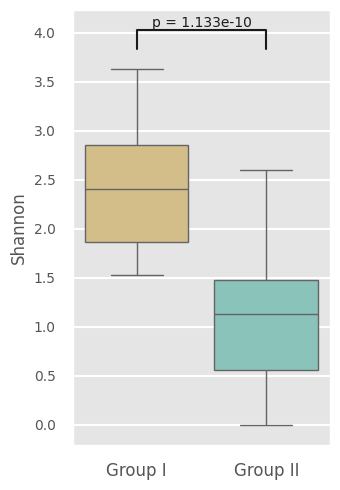

In [71]:

# Perform Kruskal-Wallis test
groups = dfinal2.groupby('Groups')['Shannon'].apply(list)
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

# Create boxplot
plt.figure(figsize=(3.5, 5))
ax = sns.boxplot(x='Groups', y='Shannon', data=dfinal2, order=['Group I', 'Group II'], palette={'Group I': '#dfc27d', 'Group II': '#80cdc1'})
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

# Remove the x-axis title
ax.set_xlabel('')

# Annotate p-value
x1, x2 = 0, 1  # Positions for the lines
y, h, col = dfinal2['Shannon'].max() + 0.2, 0.2, 'k'  # y position and height of the lines
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, f'p = {p:.3e}', ha='center', va='bottom', color=col,fontsize=10)
#Ajustar o layout
plt.tight_layout()

# Save the plot
plt.savefig('boxplot_shannon_group.png', dpi=300, bbox_inches='tight')

plt.show()

Kruskal-Wallis test statistic: 25.280366734025648, p-value: 4.957291078671501e-07


/tmp/ipykernel_115760/598453736.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Groups', y='Chao1', data=dfinal2, order=['Group I', 'Group II'], palette={'Group I': '#dfc27d', 'Group II': '#80cdc1'})


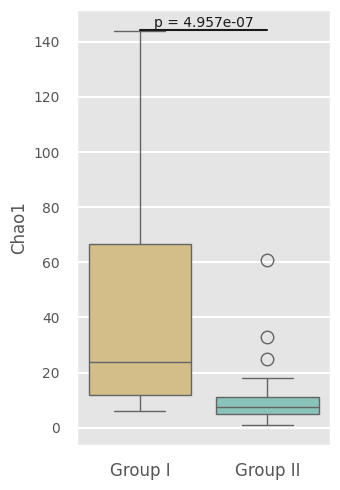

In [72]:
# Perform Kruskal-Wallis test
groups = dfinal2.groupby('Groups')['Chao1'].apply(list)
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

# Create boxplot
plt.figure(figsize=(3.5, 5))
ax = sns.boxplot(x='Groups', y='Chao1', data=dfinal2, order=['Group I', 'Group II'], palette={'Group I': '#dfc27d', 'Group II': '#80cdc1'})
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

# Remove the x-axis title
ax.set_xlabel('')

# Annotate p-value
x1, x2 = 0, 1  # Positions for the lines
y, h, col = dfinal2['Chao1'].max() + 0.2, 0.2, 'k'  # y position and height of the lines
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, f'p = {p:.3e}', ha='center', va='bottom', color=col,fontsize=10)
# Ajustar o layout
plt.tight_layout()

# Salvar os gráficos
plt.savefig('boxplot_chao1_groups.png', dpi=300, bbox_inches='tight')


plt.show()

Kruskal-Wallis test statistic: 43.61790874612108, p-value: 3.9916939598472456e-11


/tmp/ipykernel_115760/2449075132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Groups', y='Simpson', data=dfinal2, order=['Group I', 'Group II'], palette={'Group I': '#dfc27d', 'Group II': '#80cdc1'})


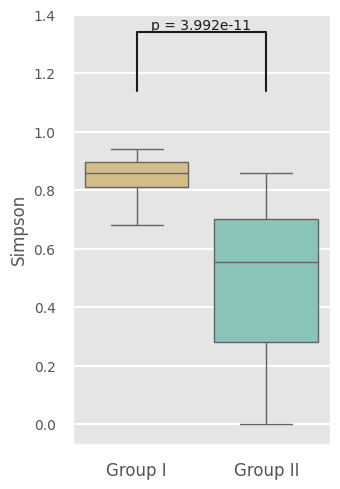

In [73]:

# Perform Kruskal-Wallis test
groups = dfinal2.groupby('Groups')['Simpson'].apply(list)
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

# Create boxplot
plt.figure(figsize=(3.5, 5))
ax = sns.boxplot(x='Groups', y='Simpson', data=dfinal2, order=['Group I', 'Group II'], palette={'Group I': '#dfc27d', 'Group II': '#80cdc1'})
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

# Remove the x-axis title
ax.set_xlabel('')

# Annotate p-value
x1, x2 = 0, 1  # Positions for the lines
y, h, col = dfinal2['Simpson'].max() + 0.2, 0.2, 'k'  # y position and height of the lines
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, f'p = {p:.3e}', ha='center', va='bottom', color=col,fontsize=10)
# Ajustar o layout
plt.tight_layout()

# Salvar os gráficos
plt.savefig('boxplot_Simpson_groups.png', dpi=300, bbox_inches='tight')


plt.show()

In [47]:
#############################
#beta diversity analysis

df_beta = df.T

# Transform relative abundance with Calculate row sums
row_sums = df_beta.sum(axis=1)
dfgenus_abundance2 = df_beta.div(row_sums, axis=0)
dfgenus_abundance2


Genus  Achromobacter  Acidibrevibacterium  Acidovorax  Acinetobacter  \
M352        0.001919             0.005813    0.007026       0.003206   
M420        0.001216             0.000000    0.001881       0.002029   
M485        0.005351             0.002296    0.007102       0.018018   
M353        0.000000             0.000000    0.000995       0.002021   
M474        0.001931             0.000000    0.007315       0.021125   
...              ...                  ...         ...            ...   
M431        0.000000             0.000000    0.000000       0.000000   
M452        0.000000             0.000000    0.000000       0.000000   
M448        0.000000             0.000000    0.000000       0.000000   
M428        0.000000             0.000000    0.000000       0.000000   
M490        0.000000             0.000000    0.000000       0.834420   

Genus  Actinoalloteichus  Actinomyces  Actinomycetospora  Actinoplanes  \
M352            0.008753          0.0           0.008307           0.0   
M420            0.001487          0.0           0.000000           0.0   
M485            0.000000          0.0           0.000000           0.0   
M353            0.000000          0.0           0.000000           0.0   
M474            0.000000          0.0           0.000000           0.0   
...                  ...          ...                ...           ...   
M431            0.000000          0.0           0.000000           0.0   
M452            0.000000          0.0           0.000000           0.0   
M448            0.000000          0.0           0.000000           0.0   
M428            0.000000          0.0           0.000000           0.0   
M490            0.000000          0.0           0.000000           0.0   

Genus  Actinosynnema  Adhaeribacter  ...  Tobamovirus  Torbevirus  Totivirus  \
M352        0.001857            0.0  ...          0.0         0.0        0.0   
M420        0.000000            0.0  ...          0.0         0.0        0.0   
M485        0.000000            0.0  ...          0.0         0.0        0.0   
M353        0.000000            0.0  ...          0.0         0.0        0.0   
M474        0.000000            0.0  ...          0.0         0.0        0.0   
...              ...            ...  ...          ...         ...        ...   
M431        0.000000            0.0  ...          0.0         0.0        0.0   
M452        0.000000            0.0  ...          0.0         0.0        0.0   
M448        0.000000            0.0  ...          0.0         0.0        0.0   
M428        0.000000            0.0  ...          0.0         0.0        0.0   
M490        0.000000            0.0  ...          0.0         0.0        0.0   

Genus  Varicellovirus  Webervirus  Andhravirus  Biseptimavirus  Pahexavirus  \
M352              0.0         0.0          0.0             0.0     0.000000   
M420              0.0         0.0          0.0             0.0     0.000000   
M485              0.0         0.0          0.0             0.0     0.024012   
M353              0.0         0.0          0.0             0.0     0.000000   
M474              0.0         0.0          0.0             0.0     0.000000   
...               ...         ...          ...             ...          ...   
M431              0.0         0.0          0.0             0.0     0.000000   
M452              0.0         0.0          0.0             0.0     0.000000   
M448              0.0         0.0          0.0             0.0     0.000000   
M428              0.0         0.0          0.0             0.0     0.000000   
M490              0.0         0.0          0.0             0.0     0.000000   

Genus  Phietavirus  Sextaecvirus  
M352      0.000000           0.0  
M420      0.000000           0.0  
M485      0.000000           0.0  
M353      0.000000           0.0  
M474      0.000000           0.0  
...            ...           ...  
M431      0.000332           0.0  
M452      0.000000           0.0  
M448      0.000000   

In [66]:
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import manifold
import skbio
from skbio.stats.composition import clr
from skbio.stats.composition import closure
from skbio.stats.composition import multiplicative_replacement

array_genus_clr = clr(multiplicative_replacement(dfgenus_abundance2))
array_genus_clr 

mds = manifold.MDS(
    n_components=2,
    max_iter=3000,
    eps=1e-9,
    dissimilarity="euclidean",
    n_jobs=1,
    n_init=1,
    normalized_stress="auto"
)
pos_sp = mds.fit(array_genus_clr).embedding_
pos_sp = pd.DataFrame(pos_sp)
bc_pc= pos_sp.set_index(dfgenus_abundance2.index)
bc_pc.columns = ["MDS1", "MDS2"]

nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="euclidean",
    n_jobs=1,
    n_init=1,
    normalized_stress="auto",
)
npos_clr = nmds.fit_transform(array_genus_clr, init=pos_sp)

npos_clr = pd.DataFrame(npos_clr)
nbc_pc_f= npos_clr.set_index(dfgenus_abundance2.index)
nbc_pc_f.columns = ["nMDS1", "nMDS2"]
nbc_pc_f

nMDS1     nMDS2
M352 -1.197026  0.235735
M420 -0.985628 -0.626013
M485 -0.983466 -0.401968
M353  0.757470 -0.838337
M474  0.369168 -1.025985
...        ...       ...
M431  0.161080  0.290881
M452  0.305510  0.176353
M448  0.393326  0.384841
M428  0.218743  0.716953
M490 -0.066763  0.394877

[72 rows x 2 columns]

In [67]:
#Import metadata
metadata = pd.read_csv("metadata.tsv", sep = '\t', index_col=0)

metadata

Groups Groups_RV   RV
Samples                         
M390      Group I   Group I  -RV
M511      Group I   Group I  -RV
M353      Group I   Group I  -RV
M484      Group I   Group I  -RV
M442      Group I   Group I  -RV
...           ...       ...  ...
M443     Group II  Group II  -RV
M479     Group II  Group II  -RV
M458     Group II  Group II  -RV
M407     Group II  Group II  -RV
M431     Group II  Group II  -RV

[72 rows x 3 columns]

In [68]:
dfinal = pd.merge(nbc_pc_f, metadata[["Groups_RV"]], left_index=True, right_index=True, how='outer')
dfinal 

nMDS1     nMDS2 Groups_RV
M318  0.776877 -0.316934  Group II
M352 -1.197026  0.235735   Group I
M353  0.757470 -0.838337   Group I
M357  1.119609 -0.368134   Group I
M359  0.122111  0.038247  Group II
...        ...       ...       ...
M517  0.015727 -0.245993   Group I
M524 -0.294408  0.137450   Group I
M526  0.113307  0.366338       +RV
M529 -0.540222 -0.000886   Group I
M530  0.143040  0.186630       +RV

[72 rows x 3 columns]

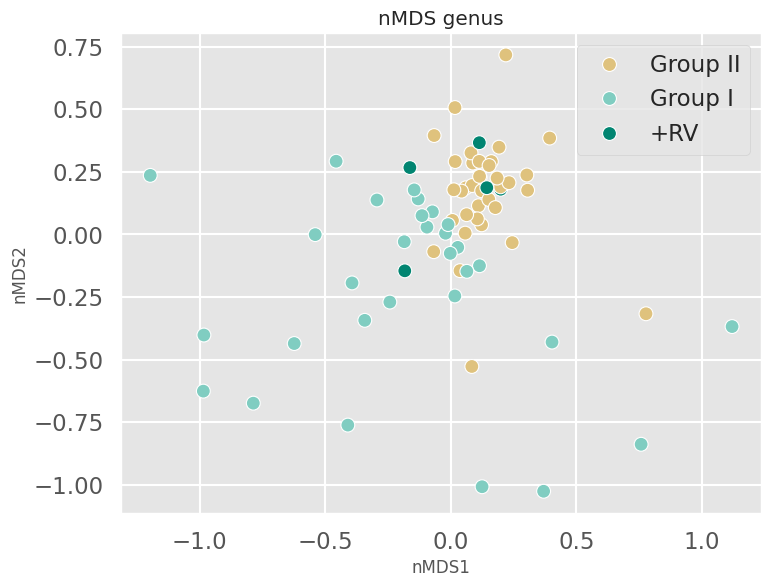

In [69]:

dic_colors={'Group II':'#dfc27d','Group I':'#80cdc1','+RV':'#018571'}
dfinal['color']=pd.Series(dfinal['Groups_RV'].map(dic_colors))
    
fig, ax = plt.subplots()
ax = plt.axes([0.0, 0.0, 1.0, 1.0])
sns.scatterplot(data=dfinal,hue='Groups_RV',x='nMDS1',y='nMDS2',palette=dic_colors,s=100)
plt.title("nMDS genus")
plt.legend(loc="upper right")
plt.xlabel("nMDS1")
plt.ylabel("nMDS2")

# Salvar os gráficos
fig.savefig('nMDSplot_alltaxon.png', format='png')
fig.savefig('nMDSplot_alltaxon.svg', format='svg')


In [21]:
dfgenus_abundance2

Genus  Acinetobacter  Byssovorax  Citrobacter  Corynebacterium  \
M420        0.000000         0.0          0.0         0.035022   
M352        0.008358         0.0          0.0         0.000000   
M485        0.223909         0.0          0.0         0.000000   
M353        0.000255         0.0          0.0         0.000000   
M435        0.000000         0.0          0.0         0.282786   
...              ...         ...          ...              ...   
M388        0.000000         0.0          0.0         0.000000   
M530        0.000000         0.0          0.0         0.000000   
M407        0.000000         0.0          0.0         0.000000   
M393        0.000000         0.0          0.0         0.000000   
M413        0.000000         0.0          0.0         0.000000   

Genus  Curtobacterium  Deinococcus  Dialister  Dolosigranulum  Duganella  \
M420              0.0      0.00105        0.0        0.388328        0.0   
M352              0.0      0.00000        0.0        0.000000        0.0   
M485              0.0      0.00000        0.0        0.000000        0.0   
M353              0.0      0.00000        0.0        0.000000        0.0   
M435              0.0      0.00000        0.0        0.000000        0.0   
...               ...          ...        ...             ...        ...   
M388              0.0      0.00000        0.0        0.000000        0.0   
M530              0.0      0.00000        0.0        0.000000        0.0   
M407              0.0      0.00000        0.0        0.000000        0.0   
M393              0.0      0.00000        0.0        0.000000        0.0   
M413              0.0      0.00000        0.0        0.000000        0.0   

Genus  Eikenella  ...  Gemykibivirus  Lymphocryptovirus  Mastadenovirus  \
M420         0.0  ...            0.0                0.0        0.000033   
M352         0.0  ...            0.0                0.0        0.000973   
M485         0.0  ...            0.0                0.0        0.003036   
M353         0.0  ...            0.0                0.0        0.000000   
M435         0.0  ...            0.0                0.0        0.000000   
...          ...  ...            ...                ...             ...   
M388         0.0  ...            0.0                0.0        0.000000   
M530         0.0  ...            0.0                0.0        0.004736   
M407         0.0  ...            0.0                0.0        0.000000   
M393         0.0  ...            0.0                0.0        0.000000   
M413         0.0  ...            0.0                0.0        0.051502   

Genus  Pegivirus  Rotavirus  Sepunavirus  Simplexvirus  Torbevirus  Totivirus  \
M420         0.0   0.000230          0.0           0.0         0.0   0.000131   
M352         0.0   0.000630          0.0           0.0         0.0   0.000000   
M485         0.0   0.002277          0.0           0.0         0.0   0.000000   
M353         0.0   0.000054          0.0           0.0         0.0   0.000000   
M435         0.0   0.001219          0.0           0.0         0.0   0.000000   
...          ...        ...          ...           ...         ...        ...   
M388         0.0   0.057971          0.0           0.0         0.0   0.000000   
M530         0.0   0.000000          0.0           0.0         0.0   0.000000   
M407         0.0   0.000000          0.0           0.0         0.0   0.000000   
M393         0.0   0.000000          0.0           0.0         0.0   0.000000   
M413         0.0   0.042918          0.0           0.0         0.0   0.000000   

Genus  Varicellovirus  
M420              0.0  
M352              0.0  
M485              0.0  
M353              0.0  
M435              0.0  
...               ...  
M388              0.0  
M530              0.0  
M407              0.0  
M393              0.0  
M413              0.0  

[72 rows x 155 columns]

/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.19066299499142852 and the largest is 4.63186620181153.
  warn(
/tmp/ipykernel_115760/299957424.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pc1_variance = explained_variance_ratio[0] * 100
/tmp/ipykernel_115760/299957424.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer 

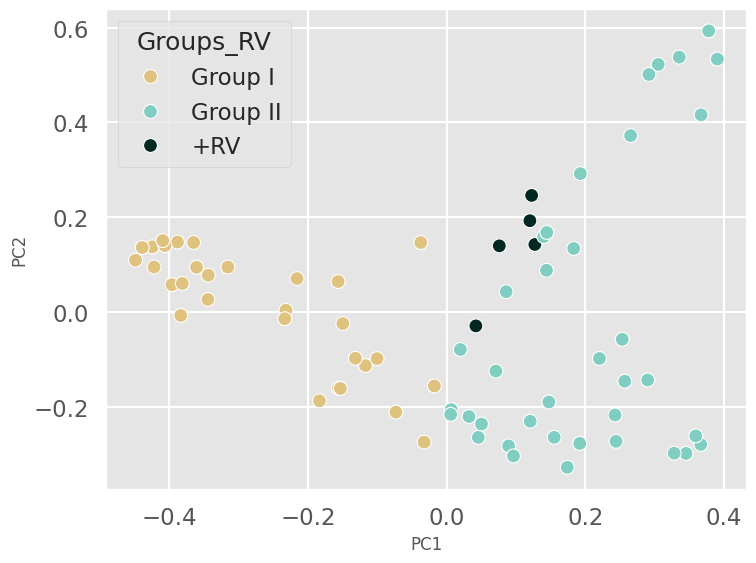

In [311]:
from skbio.stats.ordination import pcoa
## PCOA and bray curtis
bc_dm2 = beta_diversity("braycurtis", dfgenus_abundance2)
bc_pc2= pcoa(bc_dm2)
bc_pc_f= bc_pc2.samples.set_index(dfgenus_abundance2.index)
bc_pc_ff = bc_pc_f[["PC1","PC2"]]
outfile_total3 = pd.concat([bc_pc_ff,  metadata[["Groups_RV"]]], axis=1) 

dic_colors={'Group II':'#80cdc1','Group I':'#dfc27d','+RV':'#002721'}
outfile_total3['color']=pd.Series(outfile_total3['Groups_RV'].map(dic_colors))

# Obter as porcentagens de variação explicada por PC1, PC2 e PC3
explained_variance_ratio = bc_pc2.proportion_explained
pc1_variance = explained_variance_ratio[0] * 100
pc2_variance = explained_variance_ratio[1] * 100


fig, ax = plt.subplots()
ax = plt.axes([0.0, 0.0, 1.0, 1.0])
sns.scatterplot(data=outfile_total3,hue='Groups_RV',x='PC1',y='PC2',palette=dic_colors,s=100)

# Salvar os gráficos
fig.savefig('PcoAplot_alltaxon.png', format='png')
fig.savefig('PcoAplot_alltaxon.svg', format='svg')



/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.19066299499142852 and the largest is 4.63186620181153.
  warn(
/tmp/ipykernel_115760/376050877.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pc1_variance = explained_variance_ratio[0] * 100
/tmp/ipykernel_115760/376050877.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer 

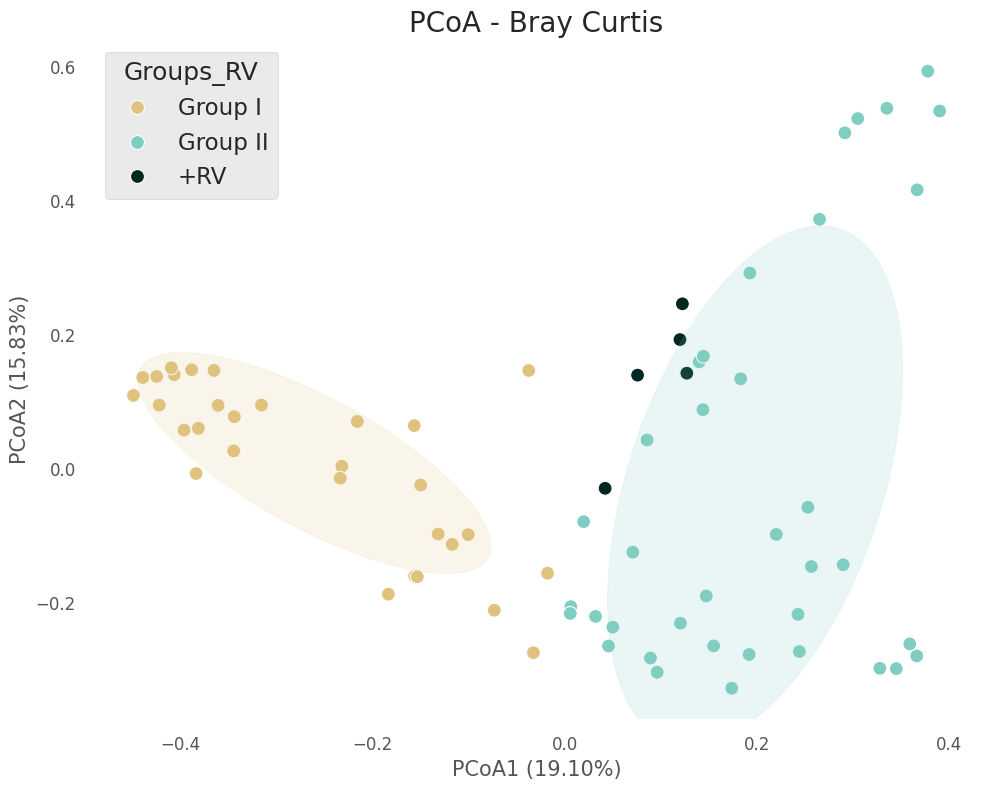

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from matplotlib.patches import Ellipse

# Calcular a matriz de distância beta usando Bray-Curtis
bc_dm2 = beta_diversity("braycurtis", dfgenus_abundance2)
bc_pc2 = pcoa(bc_dm2)
bc_pc_f = bc_pc2.samples.set_index(dfgenus_abundance2.index)
bc_pc_ff = bc_pc_f[["PC1", "PC2"]]
outfile_total3 = pd.concat([bc_pc_ff, metadata[["Groups_RV"]]], axis=1)

dic_colors = {'Group II':'#80cdc1','Group I':'#dfc27d','+RV':'#002721'}
outfile_total3['color'] = pd.Series(outfile_total3['Groups_RV'].map(dic_colors))

# Obter as porcentagens de variação explicada por PC1 e PC2
explained_variance_ratio = bc_pc2.proportion_explained
pc1_variance = explained_variance_ratio[0] * 100
pc2_variance = explained_variance_ratio[1] * 100

# Função para plotar elipse em 2D
def plot_ellipse(ax, mean, cov, color, scale_factor=3):
    v, w = np.linalg.eigh(cov)
    v = scale_factor * np.sqrt(3) * np.sqrt(v)  # Aumentar o tamanho das elipse
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = np.degrees(angle)
    
    ell = Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color=color, alpha=0.16)
    ax.add_patch(ell)

fig, ax = plt.subplots(figsize=(10, 8))

# Plotar os pontos
sns.scatterplot(data=outfile_total3, hue='Groups_RV', x='PC1', y='PC2', palette=dic_colors, s=100, ax=ax)

# Adicionar elipses para os grupos
for group, color in dic_colors.items():
    if group in ['Group I', 'Group II']:
        group_data = outfile_total3[outfile_total3['Groups_RV'] == group][['PC1', 'PC2']].values
        mean = np.mean(group_data, axis=0)
        cov = np.cov(group_data, rowvar=False)
        plot_ellipse(ax, mean, cov, color, scale_factor=1.5)

# Adicionar títulos e rótulos
ax.set_title("PCoA - Bray Curtis", fontsize=20)
ax.set_xlabel(f"PCoA1 ({pc1_variance:.2f}%)", fontsize=15)
ax.set_ylabel(f"PCoA2 ({pc2_variance:.2f}%)", fontsize=15)

# Melhorar a estética do gráfico
ax.grid(True)
ax.set_facecolor('white')

# Ajustar o tamanho da fonte dos ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Salvar os gráficos com alta resolução
fig.tight_layout()
fig.savefig('PcoAplot_alltaxon_2D_final.png', format='png', dpi=300)
fig.savefig('PcoAplot_alltaxon_2D_final.svg', format='svg', dpi=300)

# Mostrar o gráfico
plt.show()


In [56]:
bc_pc_ff.to_csv('pcoa_position.tsv', index=True, sep='\t')

/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.19066299499142852 and the largest is 4.63186620181153.
  warn(
/home/raquel/anaconda3/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


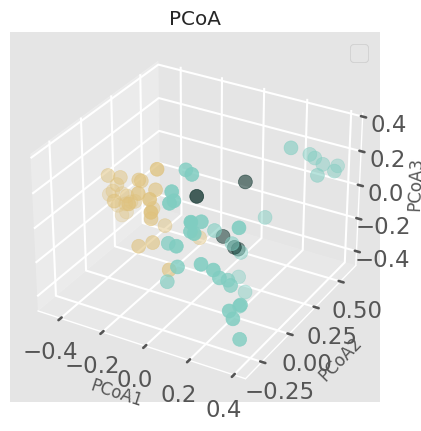

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

# Calcular a matriz de distância beta usando Bray-Curtis
bc_dm2 = beta_diversity("braycurtis", dfgenus_abundance2)
bc_pc2 = pcoa(bc_dm2)
bc_pc_f = bc_pc2.samples.set_index(dfgenus_abundance2.index)
bc_pc_ff = bc_pc_f[["PC1", "PC2", "PC3"]]
outfile_total3 = pd.concat([bc_pc_ff, metadata[["Groups_RV"]]], axis=1)

dic_colors = {'Group II':'#80cdc1','Group I':'#dfc27d','+RV':'#002721'}
outfile_total3['color'] = pd.Series(outfile_total3['Groups_RV'].map(dic_colors))

# Criar a figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos
scatter = ax.scatter(outfile_total3['PC1'], outfile_total3['PC2'], outfile_total3['PC3'], 
                     c=outfile_total3['color'], s=100)

# Adicionar títulos e rótulos
plt.title("PCoA")
ax.set_xlabel("PCoA1")
ax.set_ylabel("PCoA2")
ax.set_zlabel("PCoA3")

# Criar a legenda
legend1 = ax.legend(*scatter.legend_elements())
ax.add_artist(legend1)

# Salvar os gráficos
fig.savefig('PcoAplot_alltaxon_3D.png', format='png')
fig.savefig('PcoAplot_alltaxon_3D.svg', format='svg')

# Mostrar o gráfico
plt.show()


/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.19066299499142852 and the largest is 4.63186620181153.
  warn(
/tmp/ipykernel_115760/23625817.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pc1_variance = explained_variance_ratio[0] * 100
/tmp/ipykernel_115760/23625817.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer ke

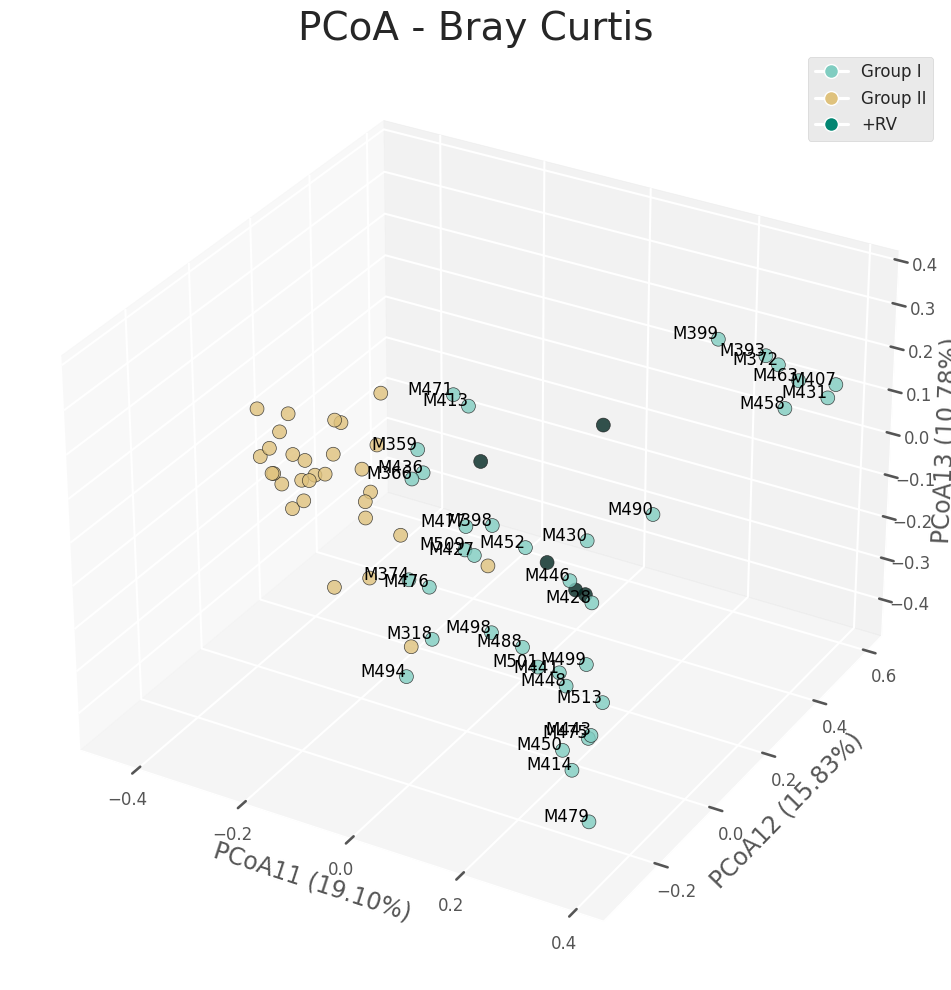

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

# Calcular a matriz de distância beta usando Bray-Curtis
bc_dm2 = beta_diversity("braycurtis", dfgenus_abundance2)
bc_pc2 = pcoa(bc_dm2)
bc_pc_f = bc_pc2.samples.set_index(dfgenus_abundance2.index)
bc_pc_ff = bc_pc_f[["PC1", "PC2", "PC3"]]
outfile_total3 = pd.concat([bc_pc_ff, metadata[["Groups_RV"]]], axis=1)

dic_colors = {'Group II':'#80cdc1','Group I':'#dfc27d','+RV':'#002721'}
outfile_total3['color'] = outfile_total3['Groups_RV'].map(dic_colors)

# Obter as porcentagens de variação explicada por PC1, PC2 e PC3
explained_variance_ratio = bc_pc2.proportion_explained
pc1_variance = explained_variance_ratio[0] * 100
pc2_variance = explained_variance_ratio[1] * 100
pc3_variance = explained_variance_ratio[2] * 100

# Configurar o estilo do gráfico
plt.style.use('ggplot')  # Usando um estilo disponível
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos
scatter = ax.scatter(outfile_total3['PC1'], outfile_total3['PC2'], outfile_total3['PC3'], 
                     c=outfile_total3['color'], s=100, edgecolor='k', alpha=0.8)

# Adicionar títulos e rótulos
plt.title("PCoA - Bray Curtis", fontsize=28)
ax.set_xlabel(f"PCoA11 ({pc1_variance:.2f}%)", fontsize=17)
ax.set_ylabel(f"PCoA12 ({pc2_variance:.2f}%)", fontsize=17)
ax.set_zlabel(f"PCoA13 ({pc3_variance:.2f}%)", fontsize=17)

# Adicionar rótulos aos pontos "Target"
for i, row in outfile_total3.iterrows():
    if row['Groups_RV'] == 'Group II':
        ax.text(row['PC1'], row['PC2'], row['PC3'], i, fontsize=12, ha='right', color='black')
    #if row['Groups_RV'] == '+RV':
    #    ax.text(row['PC1'], row['PC2'], row['PC3'], i, fontsize=12, ha='right', color='black')

# Criar a legenda
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#80cdc1', markersize=10, label='Group I'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='#dfc27d', markersize=10, label='Group II'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='#018571', markersize=10, label='+RV')]

ax.legend(handles=legend_elements, loc="best", fontsize=12)

# Melhorar a estética do gráfico
ax.grid(True)
ax.set_facecolor('white')

# Ajustar o tamanho da fonte dos ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

plt.tight_layout()



# Salvar os gráficos com alta resolução
fig.savefig('PcoAplot_alltaxon_3D.png', format='png', dpi=300)
fig.savefig('PcoAplot_alltaxon_3D.svg', format='svg', dpi=300)

# Mostrar o gráfico
plt.show()


/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.19066299499142852 and the largest is 4.63186620181153.
  warn(
/tmp/ipykernel_115760/3868620545.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pc1_variance = explained_variance_ratio[0] * 100
/tmp/ipykernel_115760/3868620545.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

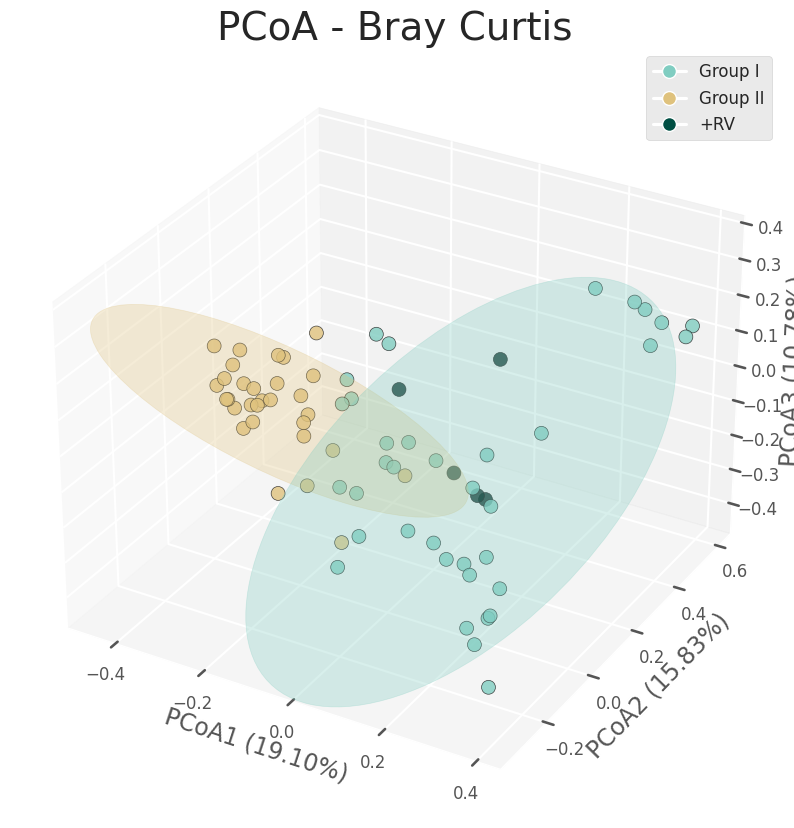

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from mpl_toolkits.mplot3d import art3d
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D

# Calcular a matriz de distância beta usando Bray-Curtis
bc_dm2 = beta_diversity("braycurtis", dfgenus_abundance2)
bc_pc2 = pcoa(bc_dm2)
bc_pc_f = bc_pc2.samples.set_index(dfgenus_abundance2.index)
bc_pc_ff = bc_pc_f[["PC1", "PC2", "PC3"]]
outfile_total3 = pd.concat([bc_pc_ff, metadata[["Groups_RV"]]], axis=1)

dic_colors = {'Group II':'#80cdc1','Group I':'#dfc27d','+RV':'#002721'}
outfile_total3['color'] = outfile_total3['Groups_RV'].map(dic_colors)

# Obter as porcentagens de variação explicada por PC1, PC2 e PC3
explained_variance_ratio = bc_pc2.proportion_explained
pc1_variance = explained_variance_ratio[0] * 100
pc2_variance = explained_variance_ratio[1] * 100
pc3_variance = explained_variance_ratio[2] * 100

# Função para plotar elipse em 2D
def plot_ellipse(ax, mean, cov, color, scale_factor=3):
    v, w = np.linalg.eigh(cov)
    v = scale_factor * np.sqrt(4) * np.sqrt(v)  # Aumentar o tamanho das elipses
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = np.degrees(angle)
    
    ell = Ellipse(xy=mean, width=v[0], height=v[1], angle=200.0 + angle, color=color, alpha=0.3)
    ax.add_patch(ell)
    art3d.pathpatch_2d_to_3d(ell, z=0, zdir="z")

# Configurar o estilo do gráfico
plt.style.use('ggplot')  # Usando um estilo disponível
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos
scatter = ax.scatter(outfile_total3['PC1'], outfile_total3['PC2'], outfile_total3['PC3'], 
                     c=outfile_total3['color'], s=100, edgecolor='k', alpha=0.8)

# Adicionar elipses para os grupos
for group, color in dic_colors.items():
    if group in ['Group I', 'Group II']:
        group_data = outfile_total3[outfile_total3['Groups_RV'] == group][['PC1', 'PC2']].values
        mean = np.mean(group_data, axis=0)
        cov = np.cov(group_data, rowvar=False)
        plot_ellipse(ax, mean, cov, color, scale_factor=3)  # Ajustar o fator de escala para aumentar o tamanho das elipses

# Adicionar títulos e rótulos
plt.title("PCoA - Bray Curtis", fontsize=28)
ax.set_xlabel(f"PCoA1 ({pc1_variance:.2f}%)", fontsize=17)
ax.set_ylabel(f"PCoA2 ({pc2_variance:.2f}%)", fontsize=17)
ax.set_zlabel(f"PCoA3 ({pc3_variance:.2f}%)", fontsize=17)

# Adicionar rótulos aos pontos "Target"
#for i, row in outfile_total3.iterrows():
#    if row['Groups_RV'] == '+RV':
#        ax.text(row['PC1'], row['PC2'], row['PC3'], i, fontsize=12, ha='right', color='black')

# Criar a legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#80cdc1', markersize=10, label='Group I'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='#dfc27d', markersize=10, label='Group II'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='#004F43', markersize=10, label='+RV')]

ax.legend(handles=legend_elements, loc="best", fontsize=12)

# Melhorar a estética do gráfico
ax.grid(True)
ax.set_facecolor('white')

# Ajustar o tamanho da fonte dos ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Salvar os gráficos com alta resolução
fig.savefig('PcoAplot_alltaxon_3D_final.png', format='png', dpi=300)
fig.savefig('PcoAplot_alltaxon_3D_final.svg', format='svg', dpi=300)

# Mostrar o gráfico
plt.show()


In [118]:
bc_pc_ff.to_csv('pcoa_position.tsv', index=True, sep='\t')

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skbio.diversity import alpha_diversity
from skbio.diversity import subsample_counts
from skbio.diversity.alpha import observed_otus

ImportError: cannot import name 'subsample_counts' from 'skbio.diversity' (/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/diversity/__init__.py)

In [52]:


# Simular dados
np.random.seed(42)
# Simular matriz de abundância de OTUs
otu_table = pd.DataFrame(
    np.random.randint(0, 100, size=(100, 10)),
    columns=[f'Sample_{i}' for i in range(1, 11)]
)

# Função para calcular a curva de rarefação
def rarefaction_curve(otu_counts, depths):
    curve = []
    for depth in depths:
        subsampled = subsample_counts(otu_counts, depth)
        curve.append(observed_otus(subsampled))
    return curve

# Calcular a curva de rarefação para cada amostra
depths = np.arange(1, otu_table.sum(axis=0).min() + 1)
rarefaction_data = {col: rarefaction_curve(otu_table[col].values, depths) for col in otu_table.columns}

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 8))

for sample, data in rarefaction_data.items():
    ax.plot(depths, data, label=sample)

# Adicionar títulos e rótulos
ax.set_title('Curva de Rarefação', fontsize=20)
ax.set_xlabel('Número de Reads', fontsize=15)
ax.set_ylabel('Número de OTUs', fontsize=15)

# Melhorar a estética do gráfico
ax.legend(title='Amostras')
ax.grid(True)
ax.set_facecolor('white')

# Ajustar o tamanho da fonte dos ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Salvar o gráfico com alta resolução
fig.tight_layout()
fig.savefig('Rarefaction_Curve.png', format='png', dpi=300)
fig.savefig('Rarefaction_Curve.svg', format='svg', dpi=300)

# Mostrar o gráfico
plt.show()



ImportError: cannot import name 'subsample_counts' from 'skbio.diversity' (/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/diversity/__init__.py)

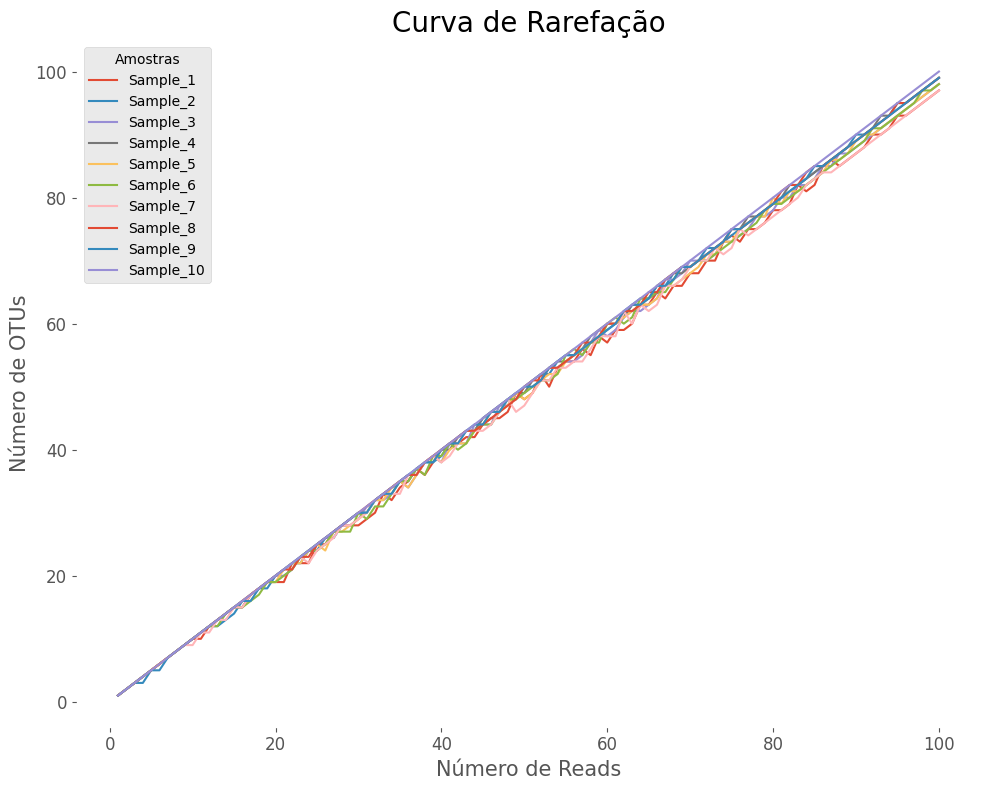

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skbio.diversity.alpha import observed_otus
from sklearn.utils import resample

# Simular dados
np.random.seed(42)
# Simular matriz de abundância de OTUs
otu_table = pd.DataFrame(
    np.random.randint(0, 100, size=(100, 10)),
    columns=[f'Sample_{i}' for i in range(1, 11)]
)

# Função para calcular a curva de rarefação
def rarefaction_curve(otu_counts, depths):
    curve = []
    for depth in depths:
        if depth > len(otu_counts):
            continue  # Skip depths larger than the number of elements in otu_counts
        subsampled = resample(otu_counts, replace=False, n_samples=depth)
        curve.append(observed_otus(subsampled))
    return curve

# Calcular a curva de rarefação para cada amostra
depths = np.arange(1, otu_table.sum(axis=0).min())
rarefaction_data = {col: rarefaction_curve(otu_table[col].values, depths) for col in otu_table.columns}

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 8))

for sample, data in rarefaction_data.items():
    ax.plot(depths[:len(data)], data, label=sample)

# Adicionar títulos e rótulos
ax.set_title('Curva de Rarefação', fontsize=20)
ax.set_xlabel('Número de Reads', fontsize=15)
ax.set_ylabel('Número de OTUs', fontsize=15)

# Melhorar a estética do gráfico
ax.legend(title='Amostras')
ax.grid(True)
ax.set_facecolor('white')

# Ajustar o tamanho da fonte dos ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Salvar o gráfico com alta resolução
fig.tight_layout()
fig.savefig('Rarefaction_Curve.png', format='png', dpi=300)
fig.savefig('Rarefaction_Curve.svg', format='svg', dpi=300)

# Mostrar o gráfico
plt.show()



In [220]:
#Import metadata
metadata2 = pd.read_csv("pcoa_position_groups.tsv", sep = '\t', index_col=0)

metadata2

PC1       PC2       PC3 GroupsII
Samples                                       
M485     0.307261 -0.211997  0.002675  Groups1
M471     0.306356 -0.223828 -0.063049  Groups1
M367     0.305484 -0.297220 -0.196992  Groups1
M388     0.302920 -0.318992 -0.228688  Groups1
M372     0.298078  0.583443 -0.224176  Groups1
...           ...       ...       ...      ...
M359    -0.104894 -0.221315 -0.240252   Group2
M448    -0.100840  0.062293  0.143713   Group2
M435    -0.098149  0.058955 -0.131252   Group2
M441    -0.056329  0.046297  0.209545   Group2
M507    -0.009360 -0.051666  0.003691   Group2

[72 rows x 4 columns]

Index(['Acinetobacter', 'Byssovorax', 'Chroococcidiopsis', 'Citrobacter',
       'Corynebacterium', 'Curtobacterium', 'Cutibacterium', 'Deinococcus',
       'Dialister', 'Dolosigranulum',
       ...
       'Gemykibivirus', 'Lymphocryptovirus', 'Mastadenovirus', 'Pegivirus',
       'Rotavirus', 'Sepunavirus', 'Simplexvirus', 'Torbevirus', 'Totivirus',
       'Varicellovirus'],
      dtype='object', name='Genus', length=167)

In [83]:
df_bray = df.T
# Transform relative abundance with Calculate row sums
row_sums = df_bray.sum(axis=1)
df_bray2 = df_bray.div(row_sums, axis=0)
df_bray2

Genus  Achromobacter  Acidibrevibacterium  Acidovorax  Acinetobacter  \
M352        0.001919             0.005813    0.007026       0.003206   
M420        0.001216             0.000000    0.001881       0.002029   
M485        0.005351             0.002296    0.007102       0.018018   
M353        0.000000             0.000000    0.000995       0.002021   
M474        0.001931             0.000000    0.007315       0.021125   
...              ...                  ...         ...            ...   
M431        0.000000             0.000000    0.000000       0.000000   
M452        0.000000             0.000000    0.000000       0.000000   
M448        0.000000             0.000000    0.000000       0.000000   
M428        0.000000             0.000000    0.000000       0.000000   
M490        0.000000             0.000000    0.000000       0.834420   

Genus  Actinoalloteichus  Actinomyces  Actinomycetospora  Actinoplanes  \
M352            0.008753          0.0           0.008307           0.0   
M420            0.001487          0.0           0.000000           0.0   
M485            0.000000          0.0           0.000000           0.0   
M353            0.000000          0.0           0.000000           0.0   
M474            0.000000          0.0           0.000000           0.0   
...                  ...          ...                ...           ...   
M431            0.000000          0.0           0.000000           0.0   
M452            0.000000          0.0           0.000000           0.0   
M448            0.000000          0.0           0.000000           0.0   
M428            0.000000          0.0           0.000000           0.0   
M490            0.000000          0.0           0.000000           0.0   

Genus  Actinosynnema  Adhaeribacter  ...  Tobamovirus  Torbevirus  Totivirus  \
M352        0.001857            0.0  ...          0.0         0.0        0.0   
M420        0.000000            0.0  ...          0.0         0.0        0.0   
M485        0.000000            0.0  ...          0.0         0.0        0.0   
M353        0.000000            0.0  ...          0.0         0.0        0.0   
M474        0.000000            0.0  ...          0.0         0.0        0.0   
...              ...            ...  ...          ...         ...        ...   
M431        0.000000            0.0  ...          0.0         0.0        0.0   
M452        0.000000            0.0  ...          0.0         0.0        0.0   
M448        0.000000            0.0  ...          0.0         0.0        0.0   
M428        0.000000            0.0  ...          0.0         0.0        0.0   
M490        0.000000            0.0  ...          0.0         0.0        0.0   

Genus  Varicellovirus  Webervirus  Andhravirus  Biseptimavirus  Pahexavirus  \
M352              0.0         0.0          0.0             0.0     0.000000   
M420              0.0         0.0          0.0             0.0     0.000000   
M485              0.0         0.0          0.0             0.0     0.024012   
M353              0.0         0.0          0.0             0.0     0.000000   
M474              0.0         0.0          0.0             0.0     0.000000   
...               ...         ...          ...             ...          ...   
M431              0.0         0.0          0.0             0.0     0.000000   
M452              0.0         0.0          0.0             0.0     0.000000   
M448              0.0         0.0          0.0             0.0     0.000000   
M428              0.0         0.0          0.0             0.0     0.000000   
M490              0.0         0.0          0.0             0.0     0.000000   

Genus  Phietavirus  Sextaecvirus  
M352      0.000000           0.0  
M420      0.000000           0.0  
M485      0.000000           0.0  
M353      0.000000           0.0  
M474      0.000000           0.0  
...            ...           ...  
M431      0.000332           0.0  
M452      0.000000           0.0  
M448      0.000000   

In [84]:
dfinal2 = pd.merge(df_bray2, metadata[["Groups"]], left_index=True, right_index=True, how='outer')
dfinal2 

Achromobacter  Acidibrevibacterium  Acidovorax  Acinetobacter  \
M318       0.000000             0.000000    0.000000       0.007090   
M352       0.001919             0.005813    0.007026       0.003206   
M353       0.000000             0.000000    0.000995       0.002021   
M357       0.000000             0.000000    0.005166       0.021040   
M359       0.000000             0.000000    0.000000       0.000000   
...             ...                  ...         ...            ...   
M517       0.000000             0.000000    0.000000       0.000000   
M524       0.000000             0.000000    0.000000       0.077688   
M526       0.000000             0.000000    0.000000       0.000000   
M529       0.000000             0.000000    0.000000       0.000000   
M530       0.000000             0.000000    0.000000       0.000000   

      Actinoalloteichus  Actinomyces  Actinomycetospora  Actinoplanes  \
M318           0.000000          0.0           0.000000           0.0   
M352           0.008753          0.0           0.008307           0.0   
M353           0.000000          0.0           0.000000           0.0   
M357           0.000000          0.0           0.000000           0.0   
M359           0.000000          0.0           0.000000           0.0   
...                 ...          ...                ...           ...   
M517           0.000000          0.0           0.000000           0.0   
M524           0.000000          0.0           0.000000           0.0   
M526           0.000000          0.0           0.000000           0.0   
M529           0.000000          0.0           0.000000           0.0   
M530           0.000000          0.0           0.000000           0.0   

      Actinosynnema  Adhaeribacter  ...  Torbevirus  Totivirus  \
M318       0.000000            0.0  ...         0.0        0.0   
M352       0.001857            0.0  ...         0.0        0.0   
M353       0.000000            0.0  ...         0.0        0.0   
M357       0.000000            0.0  ...         0.0        0.0   
M359       0.000000            0.0  ...         0.0        0.0   
...             ...            ...  ...         ...        ...   
M517       0.000000            0.0  ...         0.0        0.0   
M524       0.000000            0.0  ...         0.0        0.0   
M526       0.000000            0.0  ...         0.0        0.0   
M529       0.000000            0.0  ...         0.0        0.0   
M530       0.000000            0.0  ...         0.0        0.0   

      Varicellovirus  Webervirus  Andhravirus  Biseptimavirus  Pahexavirus  \
M318             0.0         0.0          0.0             0.0     0.004009   
M352             0.0         0.0          0.0             0.0     0.000000   
M353             0.0         0.0          0.0             0.0     0.000000   
M357             0.0         0.0          0.0             0.0     0.000000   
M359             0.0         0.0          0.0             0.0     0.000000   
...              ...         ...          ...             ...          ...   
M517             0.0         0.0          0.0             0.0     0.010385   
M524             0.0         0.0          0.0             0.0     0.000000   
M526             0.0         0.0          0.0             0.0     0.000000   
M529             0.0         0.0          0.0             0.0     0.000000   
M530             0.0         0.0          0.0             0.0     0.000000   

      Phietavirus  Sextaecvirus    Groups  
M318          0.0           0.0  Group II  
M352          0.0           0.0   Group I  
M353          0.0           0.0   Group I  
M357          0.0           0.0   Group I  
M359          0.0           0.0  Group II  
...           ...           ...       ...  
M517          0.0           0.0   Group I  
M524          0.0           0.0   Group I  
M526          0.0           0.0  Group II  
M529          0.0           0.0   Group I  
M530          0.0           0.0  Group II  

[72 rows x 559 co

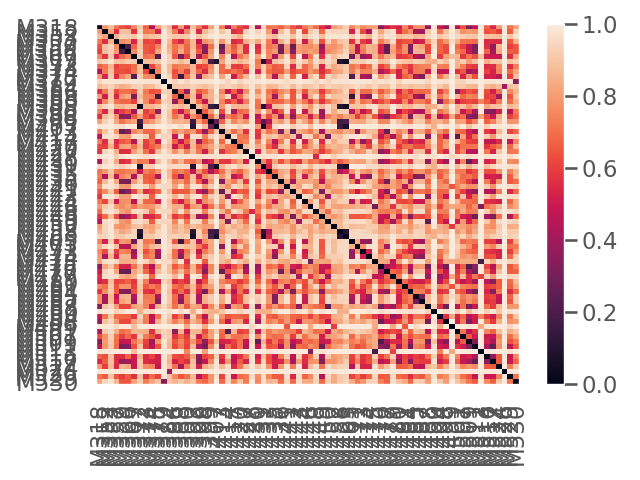

In [85]:
from skbio.diversity import beta_diversity
# Calcular la matriz de distancia de Bray-Curtis
distbray_matrix = beta_diversity("braycurtis", dfinal2.iloc[:,:-1], ids=dfinal2.index)
distbray_matrix



In [86]:
groups2 = dfinal2["Groups"].values
groups2

array(['Group II', 'Group I', 'Group I', 'Group I', 'Group II',
       'Group II', 'Group I', 'Group II', 'Group I', 'Group II',
       'Group I', 'Group II', 'Group II', 'Group I', 'Group I', 'Group I',
       'Group II', 'Group I', 'Group II', 'Group II', 'Group II',
       'Group II', 'Group II', 'Group I', 'Group I', 'Group II',
       'Group II', 'Group II', 'Group II', 'Group II', 'Group I',
       'Group II', 'Group II', 'Group I', 'Group II', 'Group I',
       'Group II', 'Group II', 'Group I', 'Group II', 'Group II',
       'Group II', 'Group II', 'Group I', 'Group II', 'Group I',
       'Group I', 'Group II', 'Group II', 'Group II', 'Group II',
       'Group I', 'Group I', 'Group I', 'Group I', 'Group I', 'Group II',
       'Group II', 'Group II', 'Group II', 'Group II', 'Group II',
       'Group I', 'Group II', 'Group I', 'Group II', 'Group I', 'Group I',
       'Group I', 'Group II', 'Group I', 'Group II'], dtype=object)

In [87]:
# Crear un factor ficticio donde cada muestra es su propio grupo


from skbio.stats.distance import permanova

# Realizar el test PERMANOVA
permanova_results = permanova(distbray_matrix, grouping=groups2)

# Ver los resultados
print(permanova_results)

#print(anosim_results)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      72
number of groups                  2
test statistic            13.225583
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


Contribuciones de las características a las coordenadas principales:
     Proportion Explained
PC1              0.191065
PC2              0.097070
PC3              0.074484


/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.18636407109807737 and the largest is 5.603976560720904.
  warn(
/home/raquel/anaconda3/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


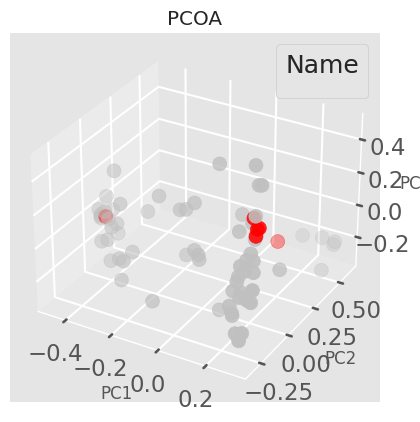

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

# Calcular la matriz de distancia beta usando Bray-Curtis
bc_dm2 = beta_diversity("braycurtis", dfgenus_abundance2)
bc_pc2 = pcoa(bc_dm2)
bc_pc_f = bc_pc2.samples.set_index(dfgenus_abundance2.index)
bc_pc_ff = bc_pc_f[["PC1", "PC2", "PC3"]]
outfile_total3 = pd.concat([bc_pc_ff, metadata[["Name"]]], axis=1)

# Calcular la contribución de cada característica a las coordenadas principales
contributions = bc_pc2.proportion_explained

# Crear un DataFrame con las contribuciones
contrib_df = pd.DataFrame(contributions, index=["PC1", "PC2", "PC3"], columns=["Proportion Explained"])

# Mapear colores
dic_colors = {'Normal': 'silver', 'Target': 'red'}
outfile_total3['color'] = pd.Series(outfile_total3['Name'].map(dic_colors))

# Mostrar las contribuciones de las características
print("Contribuciones de las características a las coordenadas principales:")
print(contrib_df)

# Crear la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotear los puntos
scatter = ax.scatter(outfile_total3['PC1'], outfile_total3['PC2'], outfile_total3['PC3'], 
                     c=outfile_total3['color'], s=100)

# Agregar títulos y etiquetas
plt.title("PCOA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Crear la leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Name")
ax.add_artist(legend1)

# Guardar los gráficos
fig.savefig('PcoAplot_alltaxon_3D.png', format='png')
fig.savefig('PcoAplot_alltaxon_3D.svg', format='svg')

# Mostrar el gráfico
plt.show()


/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.18636407109807737 and the largest is 5.603976560720904.
  warn(
/tmp/ipykernel_626692/1529176941.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pc1_variance = explained_variance_ratio[0] * 100
/tmp/ipykernel_626692/1529176941.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integ

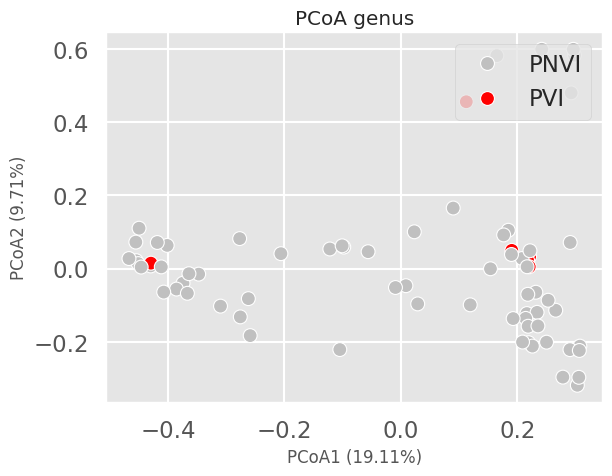

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

# Calcular a matriz de distância beta usando Bray-Curtis
bc_dm2 = beta_diversity("braycurtis", dfgenus_abundance2)
bc_pc2 = pcoa(bc_dm2)

# Obter as porcentagens de variação explicada por PC1 e PC2
explained_variance_ratio = bc_pc2.proportion_explained
pc1_variance = explained_variance_ratio[0] * 100
pc2_variance = explained_variance_ratio[1] * 100

# Preparar os dados para o gráfico
bc_pc_f = bc_pc2.samples.set_index(dfgenus_abundance2.index)
bc_pc_ff = bc_pc_f[["PC1", "PC2"]]
outfile_total3 = pd.concat([bc_pc_ff, metadata[["Groups"]]], axis=1)

dic_colors = {'PNVI': 'silver', 'PVI': 'red'}
outfile_total3['color'] = pd.Series(outfile_total3['Groups'].map(dic_colors))

# Criar a figura 2D
fig, ax = plt.subplots()
sns.scatterplot(data=outfile_total3, hue='Groups', x='PC1', y='PC2', palette=dic_colors, s=100)

# Adicionar títulos e rótulos com porcentagens de variância explicada
plt.title("PCoA genus")
plt.xlabel(f"PCoA1 ({pc1_variance:.2f}%)")
plt.ylabel(f"PCoA2 ({pc2_variance:.2f}%)")
plt.legend(loc="upper right")

# Salvar os gráficos
fig.savefig('PcoAplot_alltaxon.png', format='png')
fig.savefig('PcoAplot_alltaxon.svg', format='svg')

# Mostrar o gráfico
plt.show()


/home/raquel/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.18636407109807737 and the largest is 5.603976560720904.
  warn(
/tmp/ipykernel_280206/4196873171.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pc1_variance = explained_variance_ratio[0] * 100
/tmp/ipykernel_280206/4196873171.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integ

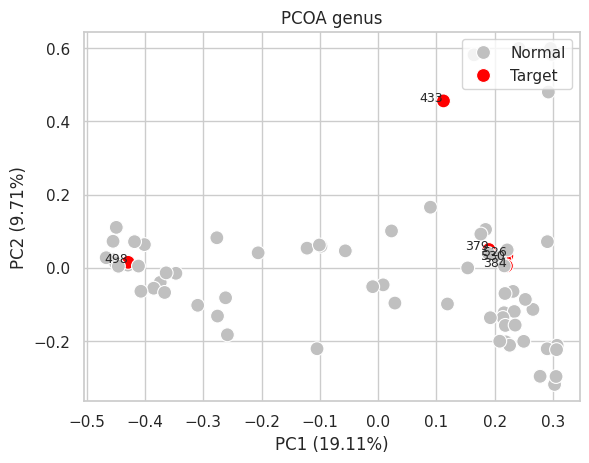

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

# Calcular a matriz de distância beta usando Bray-Curtis
bc_dm2 = beta_diversity("braycurtis", dfgenus_abundance2)
bc_pc2 = pcoa(bc_dm2)

# Obter as porcentagens de variação explicada por PC1 e PC2
explained_variance_ratio = bc_pc2.proportion_explained
pc1_variance = explained_variance_ratio[0] * 100
pc2_variance = explained_variance_ratio[1] * 100

# Preparar os dados para o gráfico
bc_pc_f = bc_pc2.samples.set_index(dfgenus_abundance2.index)
bc_pc_ff = bc_pc_f[["PC1", "PC2"]]
outfile_total3 = pd.concat([bc_pc_ff, metadata[["Name"]]], axis=1)

dic_colors = {'Normal': 'silver', 'Target': 'red'}
outfile_total3['color'] = pd.Series(outfile_total3['Name'].map(dic_colors))

# Criar a figura 2D
fig, ax = plt.subplots()
sns.scatterplot(data=outfile_total3, hue='Name', x='PC1', y='PC2', palette=dic_colors, s=100)

# Adicionar títulos e rótulos com porcentagens de variância explicada
plt.title("PCOA genus")
plt.xlabel(f"PC1 ({pc1_variance:.2f}%)")
plt.ylabel(f"PC2 ({pc2_variance:.2f}%)")
plt.legend(loc="upper right")

# Adicionar rótulos aos pontos que são "Target"
for i, row in outfile_total3.iterrows():
    if row['Name'] == 'Target':
        plt.text(row['PC1'], row['PC2'], i, fontsize=9, ha='right')

# Salvar os gráficos
fig.savefig('PcoAplot_alltaxon.png', format='png')
fig.savefig('PcoAplot_alltaxon.svg', format='svg')

# Mostrar o gráfico
plt.show()
